# Auditory Perceptual Framing Analysis Script (2021). Pitch discrimination task.Generate Choice file for all participants (pet experiment)


# Load data participants


In [86]:
# Select participants
#select_subj = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,12] 
select_subj = [1,2,3,4,5,8,9,10,11,12,13,15,17,18,19,20,21,22,23,24] 

choiceNameFrames = list()

for i in np.arange(len(select_subj)):
    choiceNameFrames1 = glob.glob('/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot'+str(select_subj[i])+'/RESULTS_FILE.txt')
    
    choiceNameFrames1.sort()
    
    choiceNameFrames.extend(choiceNameFrames1)


In [24]:
choiceNameFrames

['/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot1/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot2/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot3/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot4/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot5/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot8/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot9/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot10/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot11/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot12/RESULTS_FILE.txt',
 '/Users/pradyumn

## Join dataframes 

In [25]:
partic_num=len(choiceNameFrames) #number of participants

rateFrameRawAll = pd.DataFrame( )
choiceFrameAll = pd.DataFrame( )

for j in range (partic_num):
    choiceFrames = pd.read_csv(choiceNameFrames[j],delim_whitespace=True) 

    # add participant name column
    partNamesChoice = [int(j)]*len(choiceFrames)
    #sessionChoice = [int(os.path.basename(rateNameFrames[j])[-5])]*len(choiceFrames)

    choiceFrames['part'] = partNamesChoice 
    
    choiceFrameAll = pd.concat([choiceFrameAll,choiceFrames],ignore_index=True)


In [26]:
choiceNameFrames

['/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot1/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot2/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot3/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot4/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot5/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot8/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot9/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot10/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot11/RESULTS_FILE.txt',
 '/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot12/RESULTS_FILE.txt',
 '/Users/pradyumn

## Normalize (z-score) values

In [27]:
choiceFrameAll["logRT"] = np.log(choiceFrameAll["Choice_SND1_RT"])


choiceFrameAll["zRT"] = z_score1(choiceFrameAll,'part',"Choice_SND1_RT")
choiceFrameAll["zLogRT"] = z_score1(choiceFrameAll,'part',"logRT")


choiceFrameAll["zConf"] = z_score1(choiceFrameAll,'part',"CONF")

choiceFrameAll["zLFreq"] = z_score1(choiceFrameAll,'part',"freql")
choiceFrameAll["zRFreq"] = z_score1(choiceFrameAll,'part',"freqr")

choiceFrameAll["Choice"] = (choiceFrameAll['Choice_SND1'] == 'm')*1 + (choiceFrameAll['Choice_SND1'] == 'z')*0

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Include new variables

In [28]:
choiceFrameAll["totFreq"] = choiceFrameAll['freql'] + choiceFrameAll['freqr'] 
choiceFrameAll["dFreq"] =  - choiceFrameAll['freql'] +  choiceFrameAll['freqr'] 
choiceFrameAll["absDFreq"] =  np.abs(- choiceFrameAll['freql'] +  choiceFrameAll['freqr'] )

choiceFrameAll["zTotFreq"] = z_score1(choiceFrameAll,'part',"totFreq")
choiceFrameAll["zDFreq"] = z_score1(choiceFrameAll,'part',"dFreq")
choiceFrameAll["zAbsDFreq"] = z_score1(choiceFrameAll,'part',"absDFreq")


choiceFrameAll["choFreq"] =  ((choiceFrameAll["Choice"] == 0) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 1) *choiceFrameAll['freqr'] )
choiceFrameAll["unchoFreq"] =  ((choiceFrameAll["Choice"] == 1) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 0) *choiceFrameAll['freqr'] )

choiceFrameAll["zChoFreq"] = z_score1(choiceFrameAll,'part',"choFreq")
choiceFrameAll["zUnchoFreq"] = z_score1(choiceFrameAll,'part',"unchoFreq")

In [29]:
choiceFrameAll.columns

Index(['Session_Name_', 'Trial_Index_', 'expcond', 'trialn', 'noisecond',
       'whichfirstopt', 'noiseinl', 'noiseinr', 'freql', 'freqr', 'frame',
       'Frame_Name', 'Slider_X', 'Choice_SND1_Time', 'CONF', 'CONF_RT',
       'Choice_SND1', 'Choice_SND1_RT', 'TRIAL_N_LIVE', 'expcond_1',
       'trialn_1', 'noisecond_1', 'whichfirstopt_1', 'noiseinl_1',
       'noiseinr_1', 'freql_1', 'freqr_1', 'frame_1', 'itm_1', 'itm', 'part',
       'key_pract', 'logRT', 'zRT', 'zLogRT', 'zConf', 'zLFreq', 'zRFreq',
       'Choice', 'totFreq', 'dFreq', 'absDFreq', 'zTotFreq', 'zDFreq',
       'zAbsDFreq', 'choFreq', 'unchoFreq', 'zChoFreq', 'zUnchoFreq'],
      dtype='object')

In [30]:
data_splits = splitBy(choiceFrameAll, Splits_headers = ['ConfSplit'],Splits_variables = ['zConf'])
choiceFrameAll['ConfSplit'] = data_splits['ConfSplit'].values

In [31]:
choiceFrameAll

,Session_Name_,Trial_Index_,expcond,trialn,noisecond,whichfirstopt,noiseinl,noiseinr,freql,freqr,...,dFreq,absDFreq,zTotFreq,zDFreq,zAbsDFreq,choFreq,unchoFreq,zChoFreq,zUnchoFreq,ConfSplit
0,pilot1,21,Experiment,118,1,0,1,1,4,1,...,-3,3,-1.566699,-0.700649,-0.301511,1,4,-1.565104,-0.504956,0.0
1,pilot1,22,Experiment,134,1,0,1,1,5,9,...,4,4,0.783349,0.934199,0.150756,5,9,-0.197537,1.270279,0.0
2,pilot1,23,Experiment,140,1,0,1,1,6,5,...,-1,1,0.000000,-0.233550,-1.206045,5,6,-0.197537,0.205138,0.0
3,pilot1,24,Experiment,177,1,0,1,1,10,6,...,-4,4,1.305582,-0.934199,0.150756,6,10,0.144354,1.625326,0.0
4,pilot1,25,Experiment,107,1,0,1,1,2,9,...,7,7,0.000000,1.634848,1.507557,2,9,-1.223212,1.270279,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,Pilot24,196,Experiment,112,1,0,1,1,3,5,...,2,2,-0.783349,0.467099,-0.753778,3,5,-0.851419,-0.187343,0.0
3595,Pilot24,197,Experiment,94,1,0,1,1,1,5,...,4,4,-1.305582,0.934199,0.150756,1,5,-1.541758,-0.187343,1.0
3596,Pilot24,198,Experiment,178,1,0,1,1,10,7,...,-3,3,1.566699,-0.700649,-0.301511,7,10,0.529260,1.568996,0.0
3597,Pilot24,199,Experiment,120,1,0,1,1,4,3,...,-1,1,-1.044466,-0.233550,-1.206045,3,4,-0.851419,-0.538611,0.0


In [32]:
choiceFrameAll.columns

Index(['Session_Name_', 'Trial_Index_', 'expcond', 'trialn', 'noisecond',
       'whichfirstopt', 'noiseinl', 'noiseinr', 'freql', 'freqr', 'frame',
       'Frame_Name', 'Slider_X', 'Choice_SND1_Time', 'CONF', 'CONF_RT',
       'Choice_SND1', 'Choice_SND1_RT', 'TRIAL_N_LIVE', 'expcond_1',
       'trialn_1', 'noisecond_1', 'whichfirstopt_1', 'noiseinl_1',
       'noiseinr_1', 'freql_1', 'freqr_1', 'frame_1', 'itm_1', 'itm', 'part',
       'key_pract', 'logRT', 'zRT', 'zLogRT', 'zConf', 'zLFreq', 'zRFreq',
       'Choice', 'totFreq', 'dFreq', 'absDFreq', 'zTotFreq', 'zDFreq',
       'zAbsDFreq', 'choFreq', 'unchoFreq', 'zChoFreq', 'zUnchoFreq',
       'ConfSplit'],
      dtype='object')

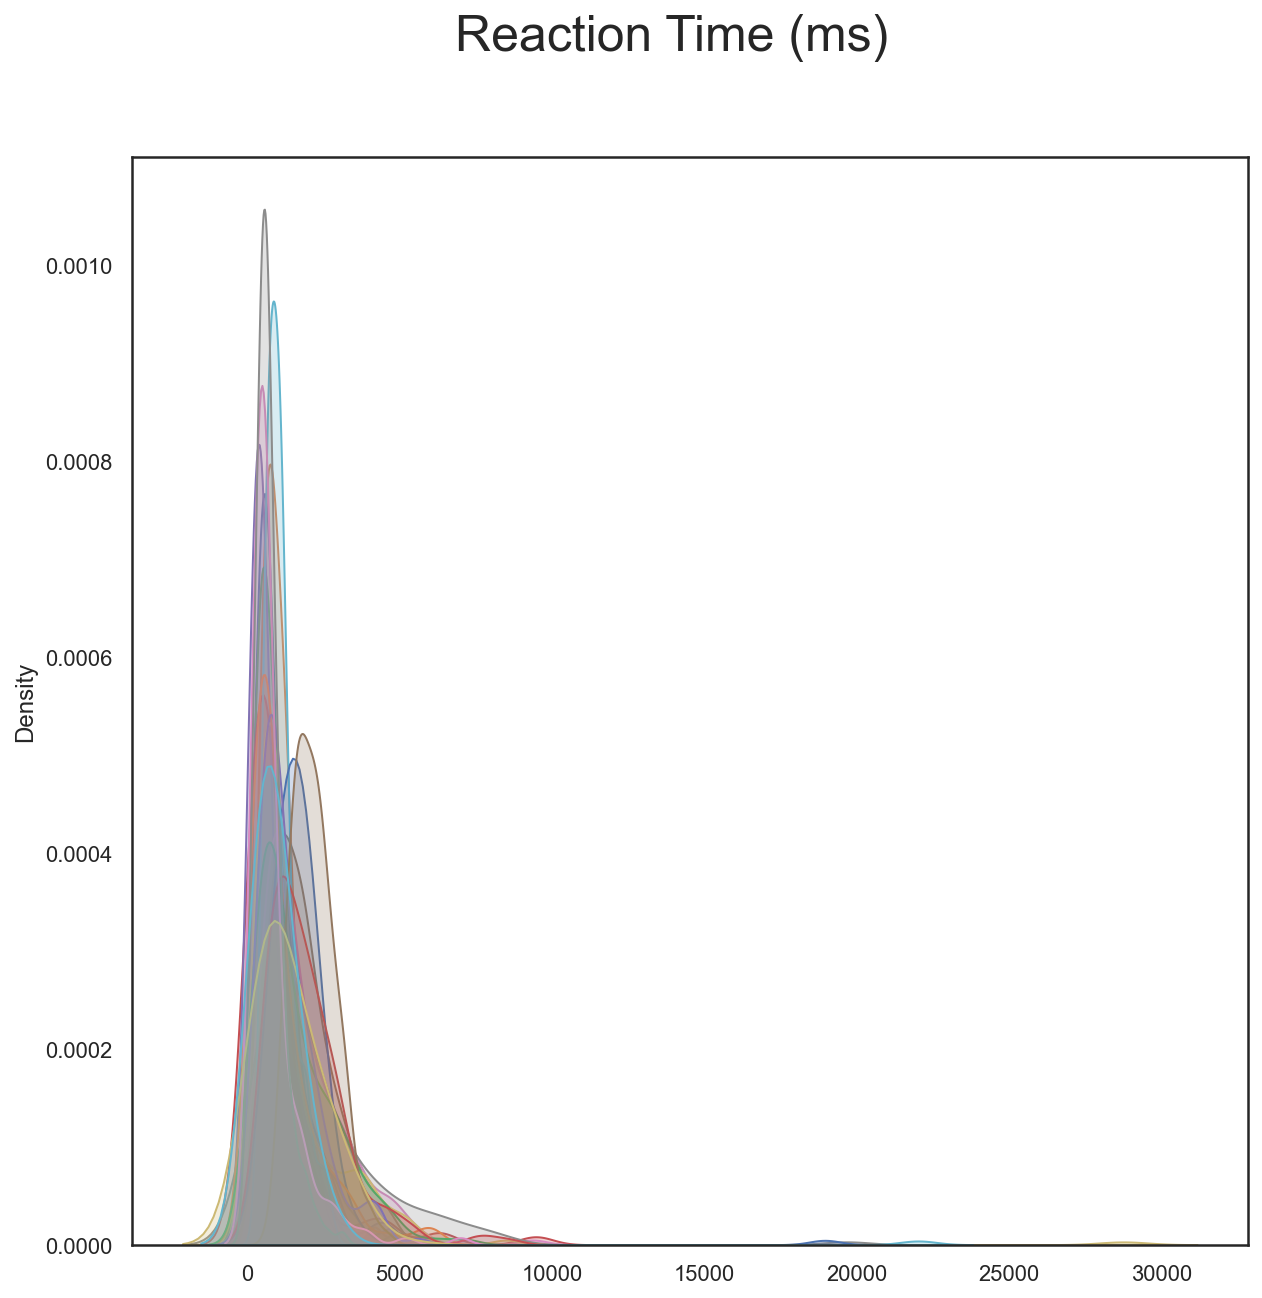

In [33]:
participant_densities(choiceFrameAll,'Choice_SND1_RT', title = 'Reaction Time (ms)')

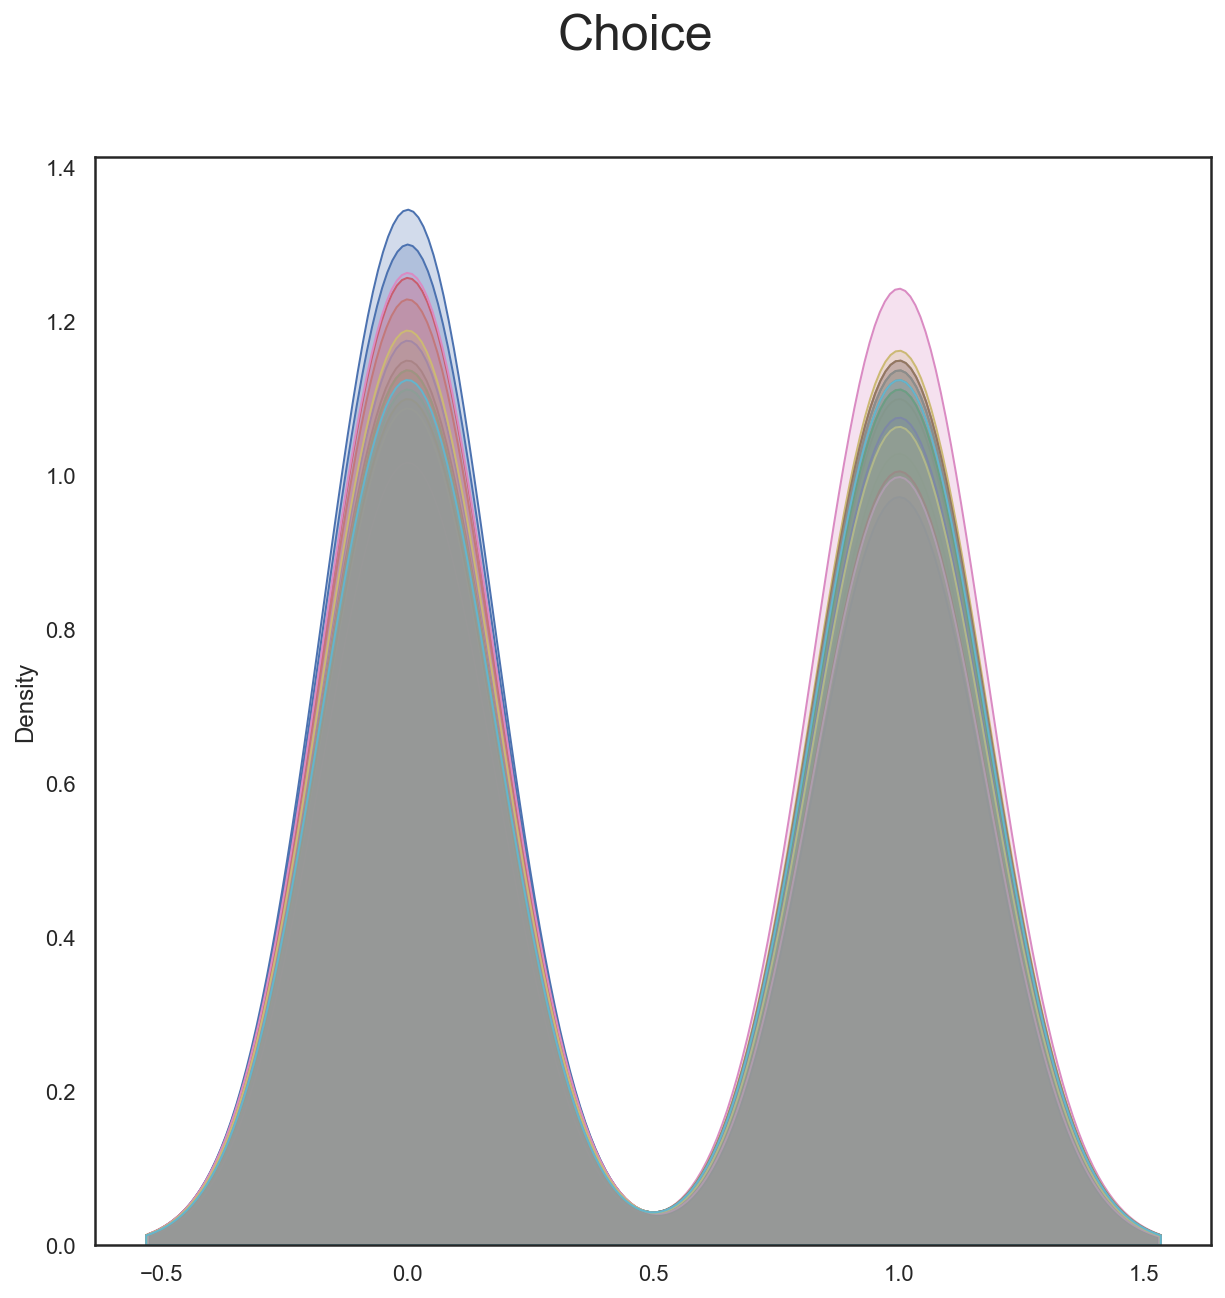

In [34]:
participant_densities(choiceFrameAll,'Choice', title = 'Choice')

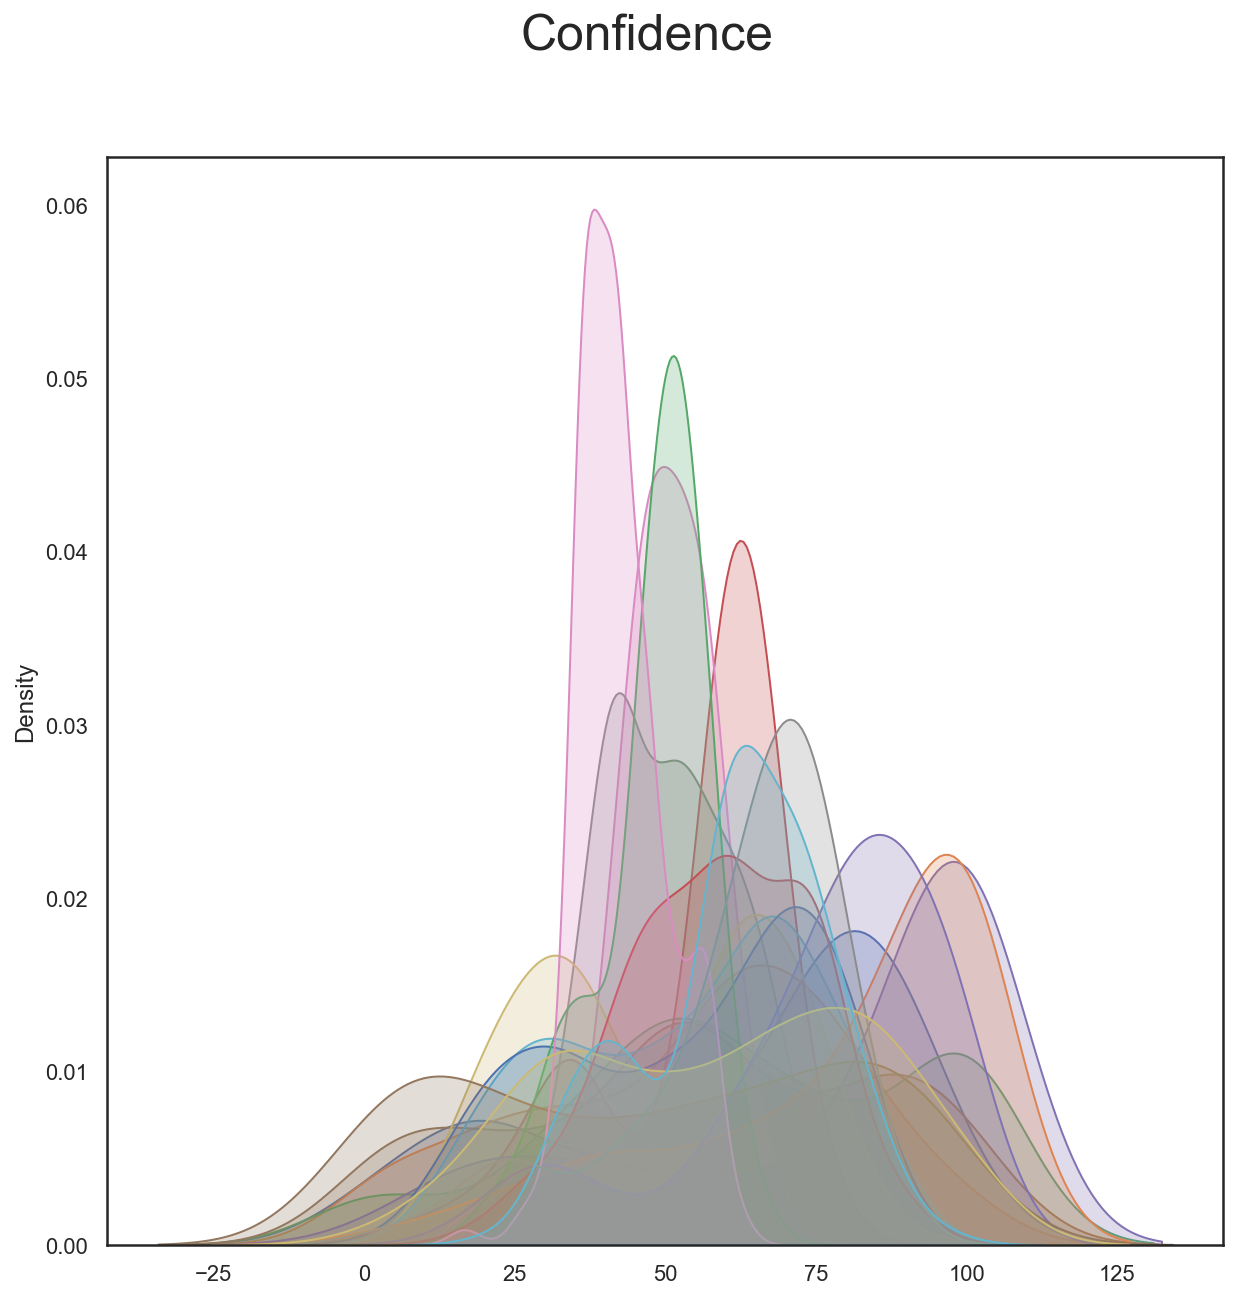

In [35]:
participant_densities(choiceFrameAll,'CONF', title = 'Confidence')

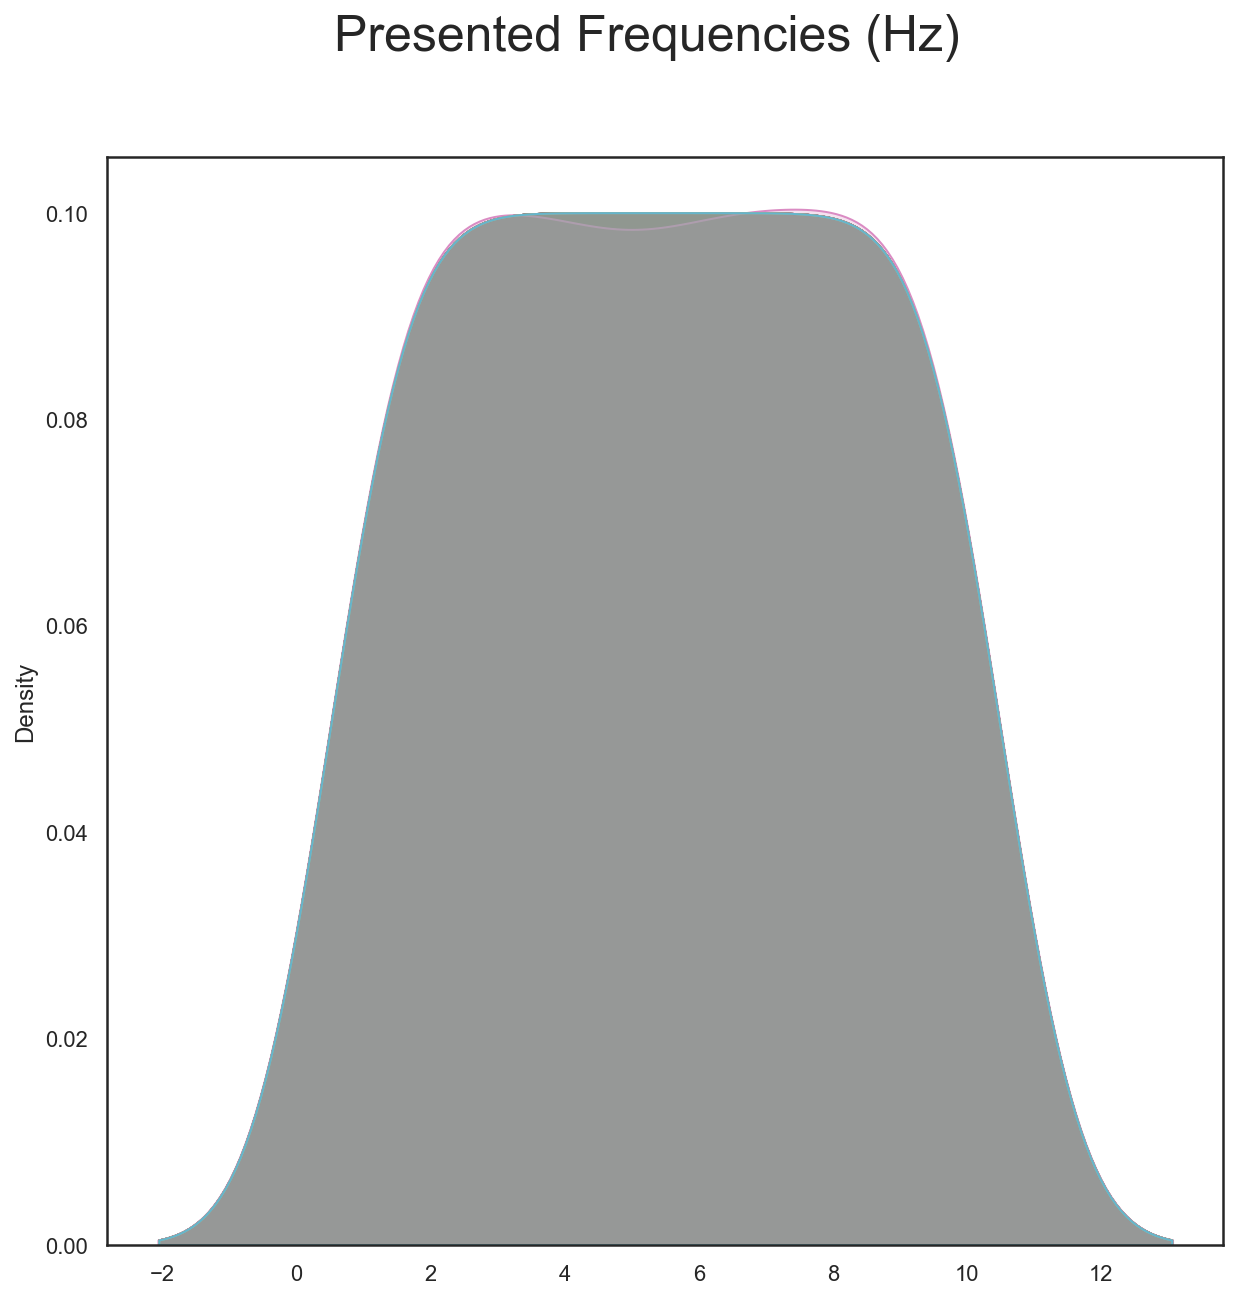

In [36]:
participant_densities(choiceFrameAll,'freql', title = 'Presented Frequencies (Hz)')

## Check confidence range

In [85]:
ExclusionMatrix = []
#for cycle for participant
for k in choiceFrameAll['part'].unique():
 
    # Checking for confidence
    participant_data = choiceFrameAll.loc[ (choiceFrameAll['part'] == k)]
    ConfidencePart =   participant_data ['CONF']
    
    ConfRange = max(ConfidencePart) - min(ConfidencePart)
    ConfCounts = ConfidencePart.value_counts()
    
    maxConfCounts = max(ConfCounts)
    ConfCountsTotal = sum(int(i) for i in ConfCounts.values)
    
    PropnMostFreqConf = maxConfCounts / ConfCountsTotal
    PropnRangeConf = ConfRange / 100

    
    ExclusionMatrix.append([k , PropnMostFreqConf, PropnRangeConf]) 


ExclusionMatrix=pd.DataFrame(ExclusionMatrix,columns=['Participant','ProportionMostFrequentConfidence', 'ProportionRangeConfidence'])

ExclusionMatrix

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will g

,Participant,ProportionMostFrequentConfidence,ProportionRangeConfidence
0,0,0.161111,1.0000
1,1,0.144444,1.0000
2,2,0.250000,1.0000
3,3,0.333333,0.7667
4,4,0.461111,1.0000
5,5,0.200000,1.0000
6,6,0.238889,0.5500
7,7,0.216667,0.6500
8,8,0.127778,0.8000
9,9,0.166667,0.7500


ProportionMostFrequentConfidence : the proportion of all the confidence values that have been reported with a single (most frequent) value (0: no repetition, 1: all items received the same confidence value )  
ProportionRangeConfidence : proportion of the whole range that was covered by the confidence values (0: no range, 1: whole range covered)

## Exclusion criteria:
1. Participants used less than 25% of the choice confidence scales.  
2. Participants gave exactly the same confidence rating for more than 50% of their choices.


# Calculate the accuracy

In [37]:
Correct = []
for i in range(len(choiceFrameAll)):
    if choiceFrameAll.frame[i] == 1:
        if (choiceFrameAll.Choice[i] == 1 and (choiceFrameAll.zLFreq[i] <= choiceFrameAll.zRFreq[i])) or (choiceFrameAll.Choice[i] == 0 and (choiceFrameAll.zLFreq[i] >= choiceFrameAll.zRFreq[i])):
            Correct.append(1)
            
        else:
            Correct.append(0)
    if choiceFrameAll.frame[i] == 2:
        if (choiceFrameAll.Choice[i] == 0 and (choiceFrameAll.zLFreq[i] <= choiceFrameAll.zRFreq[i])) or (choiceFrameAll.Choice[i] == 1 and (choiceFrameAll.zLFreq[i] >= choiceFrameAll.zRFreq[i])):
            Correct.append(1)
        else:
            Correct.append(0)

choiceFrameAll["correct"] = Correct

In [38]:
#choiceFrameAll["correct_side"] = ((choiceFrameAll["frame"] == 1) * (choiceFrameAll.zLFreq <= choiceFrameAll.zRFreq)) + ((choiceFrameAll["frame"] == 2) * (choiceFrameAll.zLFreq >= choiceFrameAll.zRFreq))

In [39]:
choiceFrameAll

,Session_Name_,Trial_Index_,expcond,trialn,noisecond,whichfirstopt,noiseinl,noiseinr,freql,freqr,...,absDFreq,zTotFreq,zDFreq,zAbsDFreq,choFreq,unchoFreq,zChoFreq,zUnchoFreq,ConfSplit,correct
0,pilot1,21,Experiment,118,1,0,1,1,4,1,...,3,-1.566699,-0.700649,-0.301511,1,4,-1.565104,-0.504956,0.0,1
1,pilot1,22,Experiment,134,1,0,1,1,5,9,...,4,0.783349,0.934199,0.150756,5,9,-0.197537,1.270279,0.0,1
2,pilot1,23,Experiment,140,1,0,1,1,6,5,...,1,0.000000,-0.233550,-1.206045,5,6,-0.197537,0.205138,0.0,1
3,pilot1,24,Experiment,177,1,0,1,1,10,6,...,4,1.305582,-0.934199,0.150756,6,10,0.144354,1.625326,0.0,1
4,pilot1,25,Experiment,107,1,0,1,1,2,9,...,7,0.000000,1.634848,1.507557,2,9,-1.223212,1.270279,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,Pilot24,196,Experiment,112,1,0,1,1,3,5,...,2,-0.783349,0.467099,-0.753778,3,5,-0.851419,-0.187343,0.0,1
3595,Pilot24,197,Experiment,94,1,0,1,1,1,5,...,4,-1.305582,0.934199,0.150756,1,5,-1.541758,-0.187343,1.0,1
3596,Pilot24,198,Experiment,178,1,0,1,1,10,7,...,3,1.566699,-0.700649,-0.301511,7,10,0.529260,1.568996,0.0,1
3597,Pilot24,199,Experiment,120,1,0,1,1,4,3,...,1,-1.044466,-0.233550,-1.206045,3,4,-0.851419,-0.538611,0.0,1


In [40]:
#participant_densities(choiceFrameAll,'correct_side', title = 'Correct side')

# drop columns that generate problems

In [41]:
choiceFrameAll = choiceFrameAll.drop(columns = ['expcond_1','trialn_1','noisecond_1','whichfirstopt_1','noiseinl_1','noiseinr_1','freql_1','freqr_1','frame_1','key_pract'])

# split the dataframe

In [42]:
data_expHigh = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] # 1 = high, 2 = low
data_expLow = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] # 1 = high, 2 = low

In [43]:
accuracies = pd.DataFrame( columns = [])
accuracyH = []
accuracyL = []

for i in choiceFrameAll.part.unique():
    accuracyH.append(choiceFrameAll.loc[(choiceFrameAll['frame'] == 1) & (choiceFrameAll['part'] == i)].correct.mean())
    #print(accuracy_like)

    accuracyL.append(choiceFrameAll.loc[(choiceFrameAll['frame'] == 2) & (choiceFrameAll['part'] == i)].correct.mean())
    #print(accuracy_dislike)

accuracies['participant'] = range(len(choiceFrameAll.part.unique()))
accuracies['high'] = accuracyH
accuracies['low'] = accuracyL

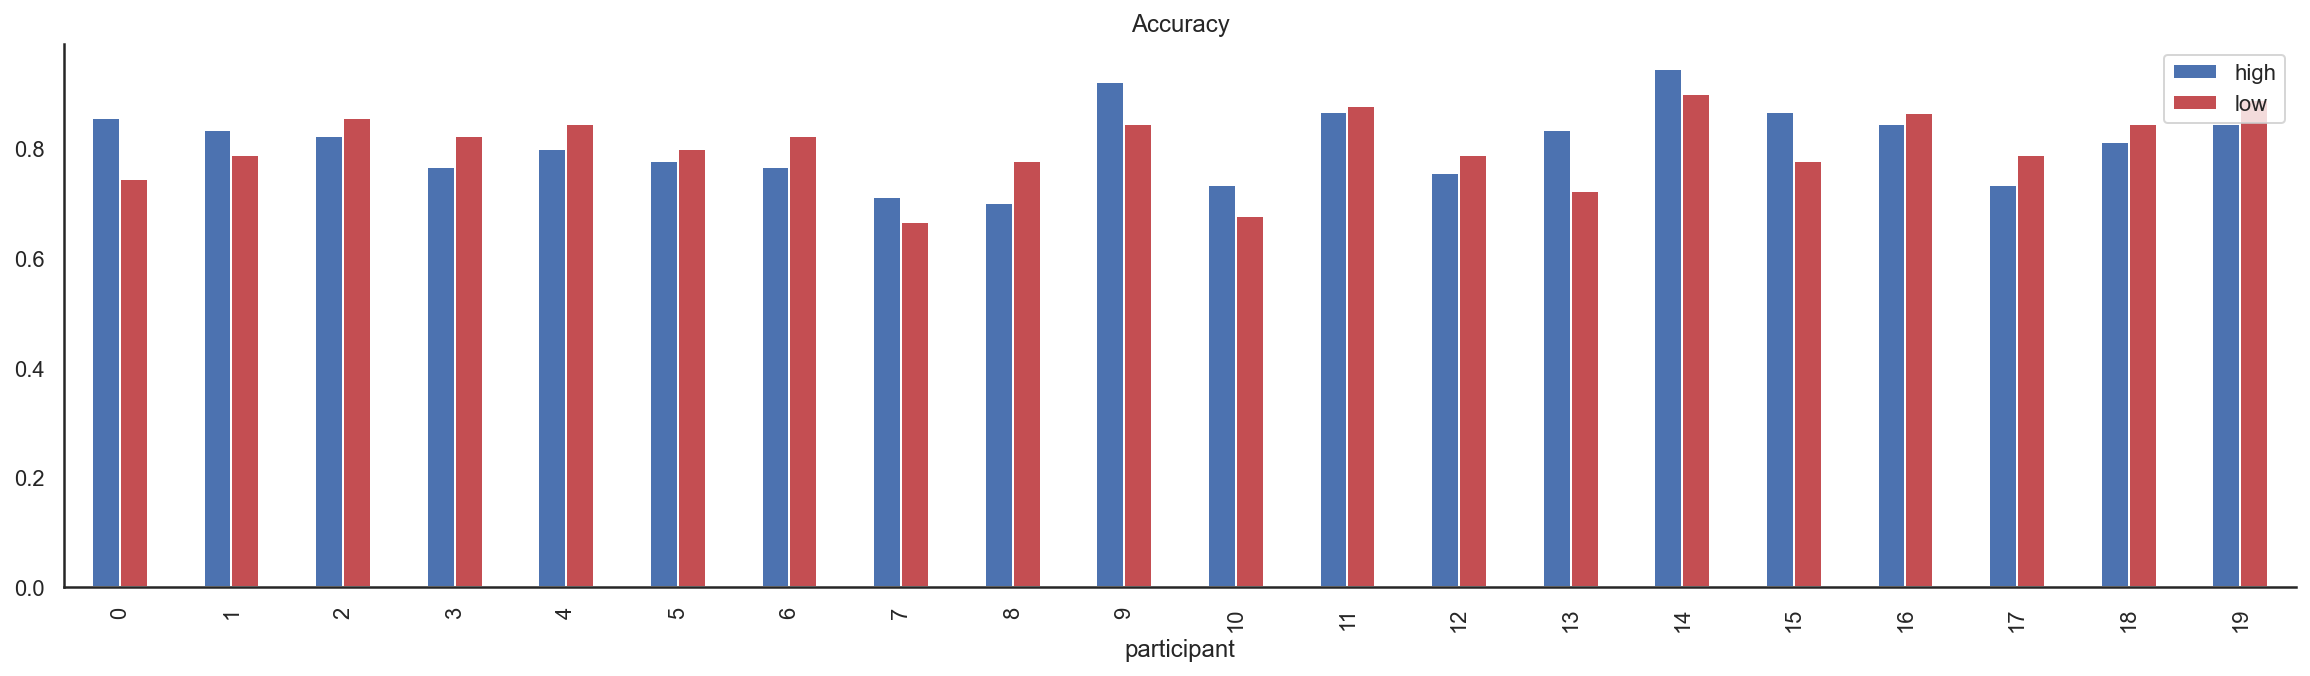

In [44]:
accuracies.plot.bar(x='participant',y=['high','low'], figsize=(20,5),title = 'Accuracy',color = ['b','r'])
#ax.set_ylim(0, 1)
plt.xticks(range(0,len(choiceFrameAll["part"].unique())), choiceFrameAll["part"].unique())
sns.despine()


In [45]:
accuracies

,participant,high,low
0,0,0.855556,0.744444
1,1,0.833333,0.788889
2,2,0.822222,0.855556
3,3,0.766667,0.822222
4,4,0.800000,0.844444
5,5,0.777778,0.800000
6,6,0.766667,0.822222
7,7,0.711111,0.666667
8,8,0.700000,0.777778
9,9,0.922222,0.844444


## there is no significant difference in performanace between frames

In [46]:
stats.ttest_rel(accuracies.high,accuracies.low)

Ttest_relResult(statistic=0.33089490761860224, pvalue=0.7443452101079475)

# choice logistic

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.

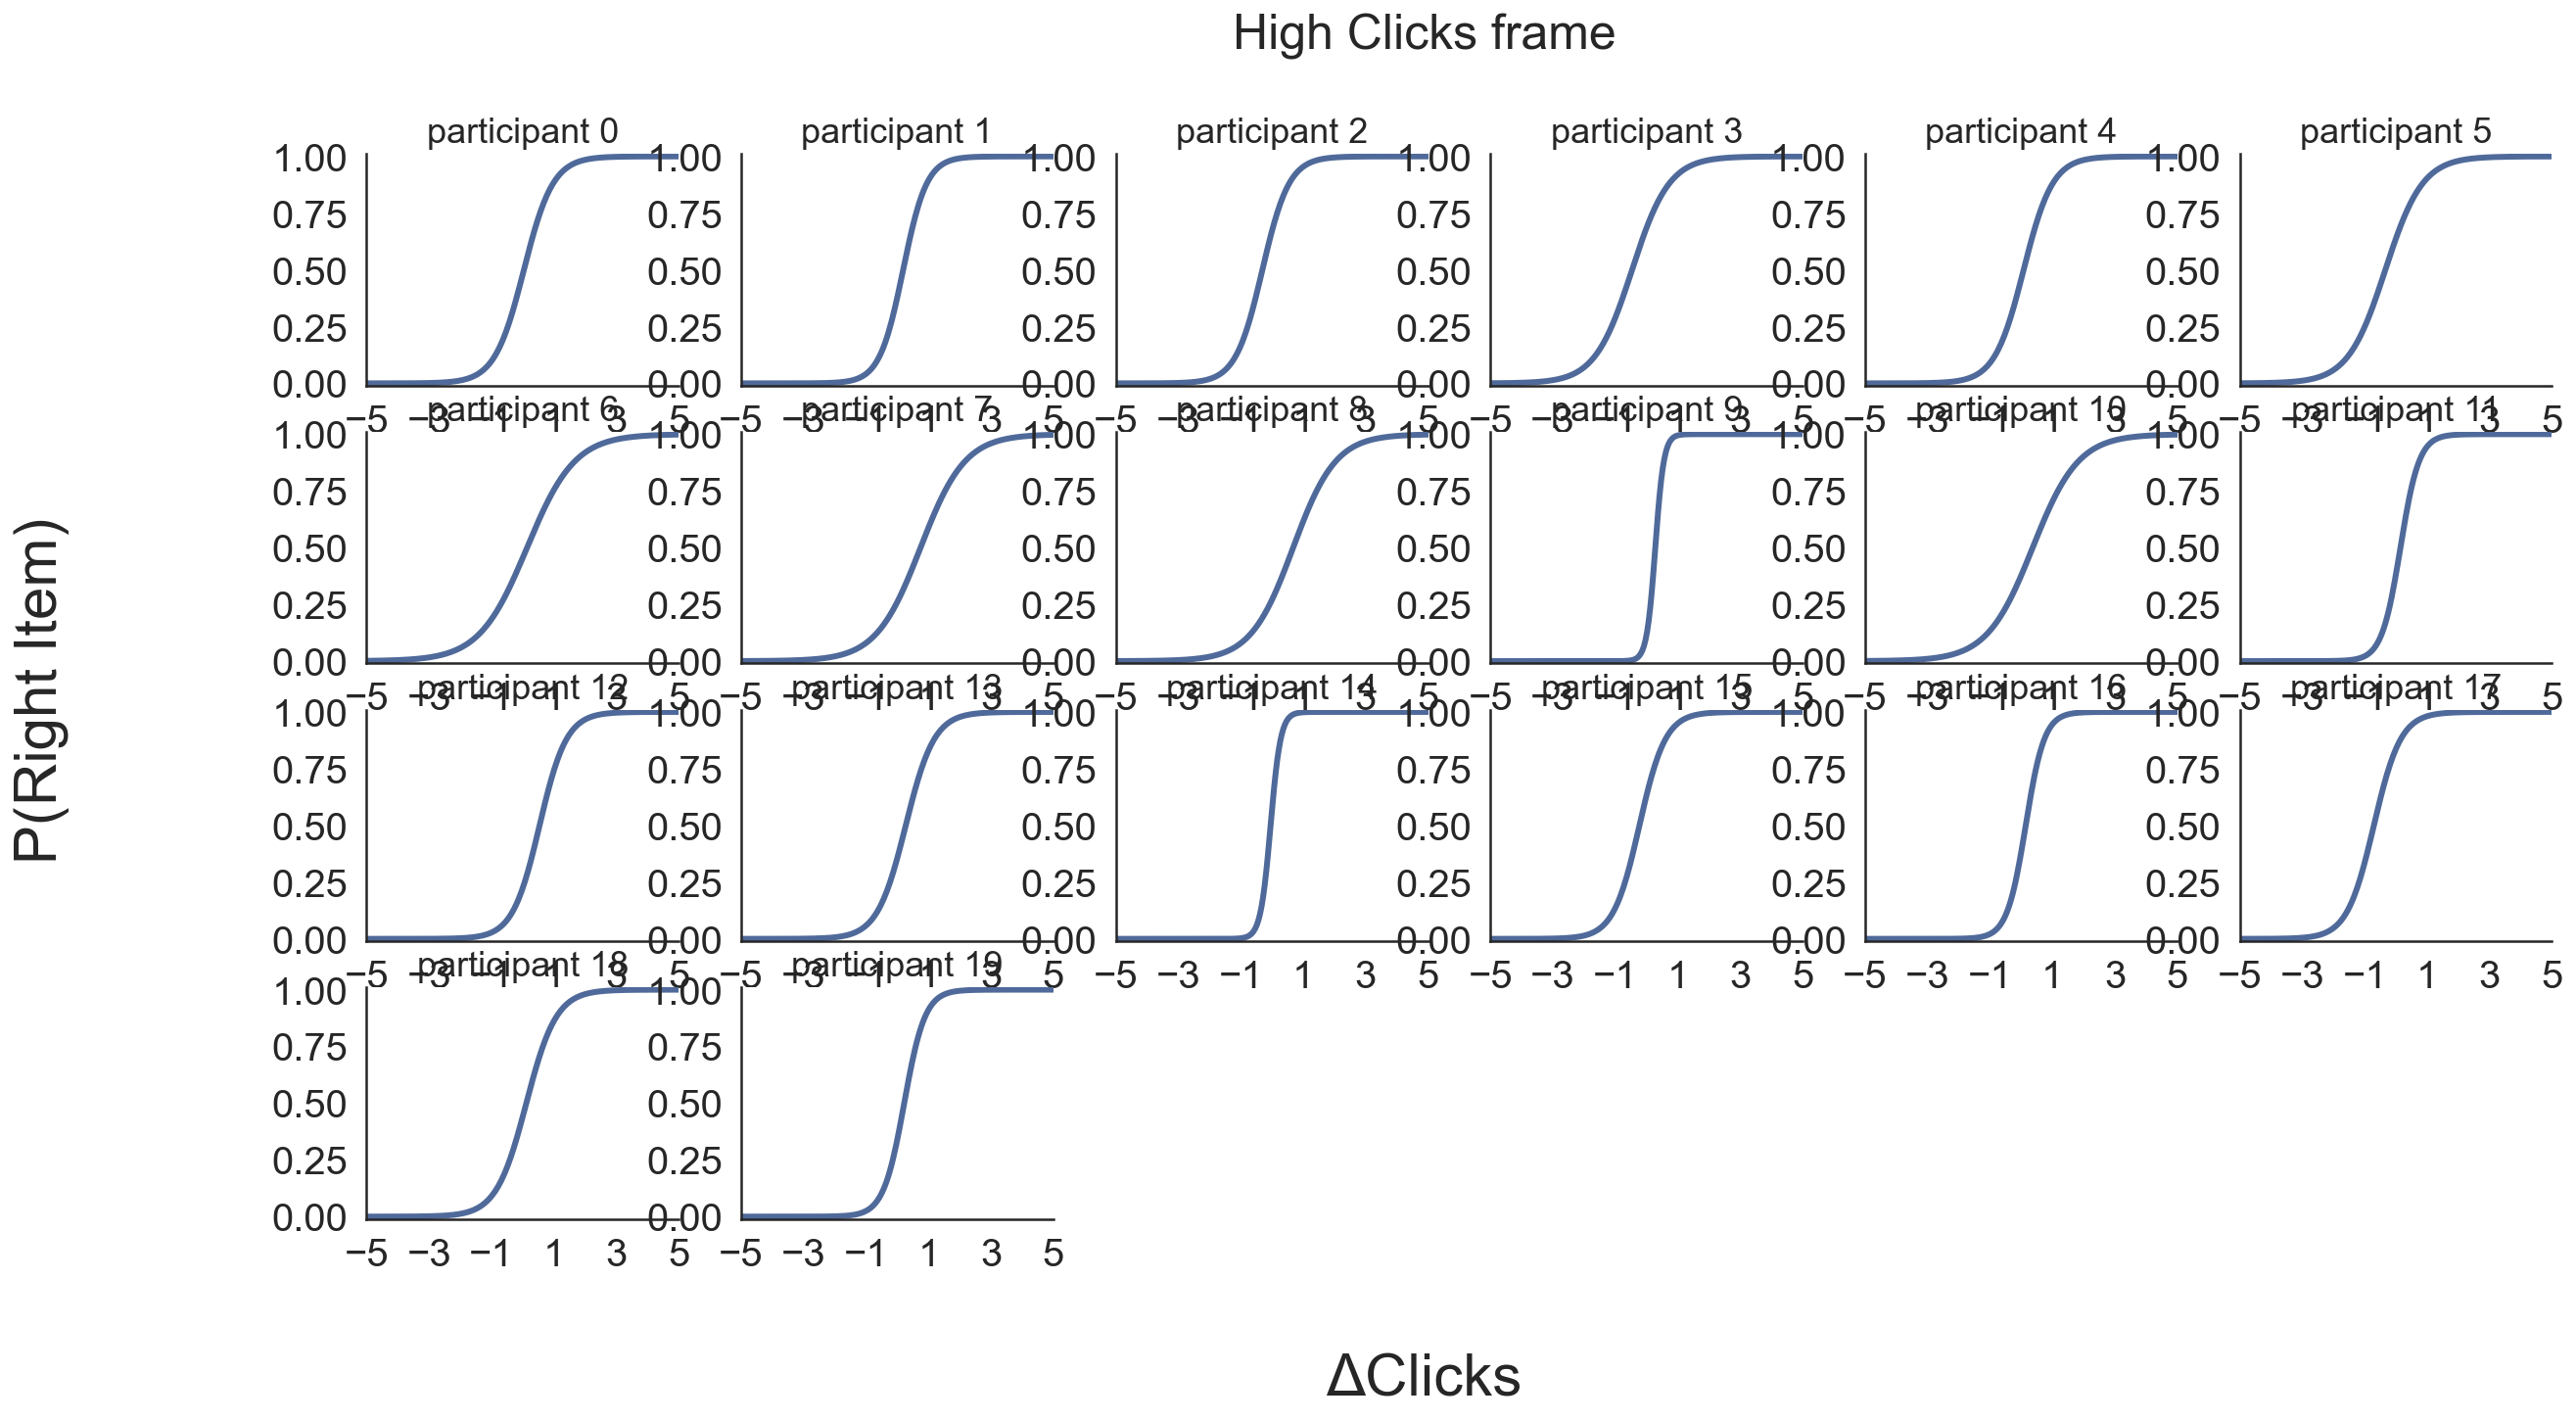

In [47]:
logisticplot_all_part( data=data_expHigh, xaxis='zDFreq', yaxis='Choice', ylab='P(Right Item)', xlab= r'ΔClicks',
                 modlowcol='#4F6A9A', title='High Clicks frame', parvar='part')

In [48]:
#coeficientes_like = logisticplot_all_sbj_slope('ConfSplit', 'High Conf', 'Low Conf', data=data_expHigh, xaxis='zDFreq', yaxis='Choice', ylab='P(Right Item)', xlab='ΔFrequency',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='part')
#plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.

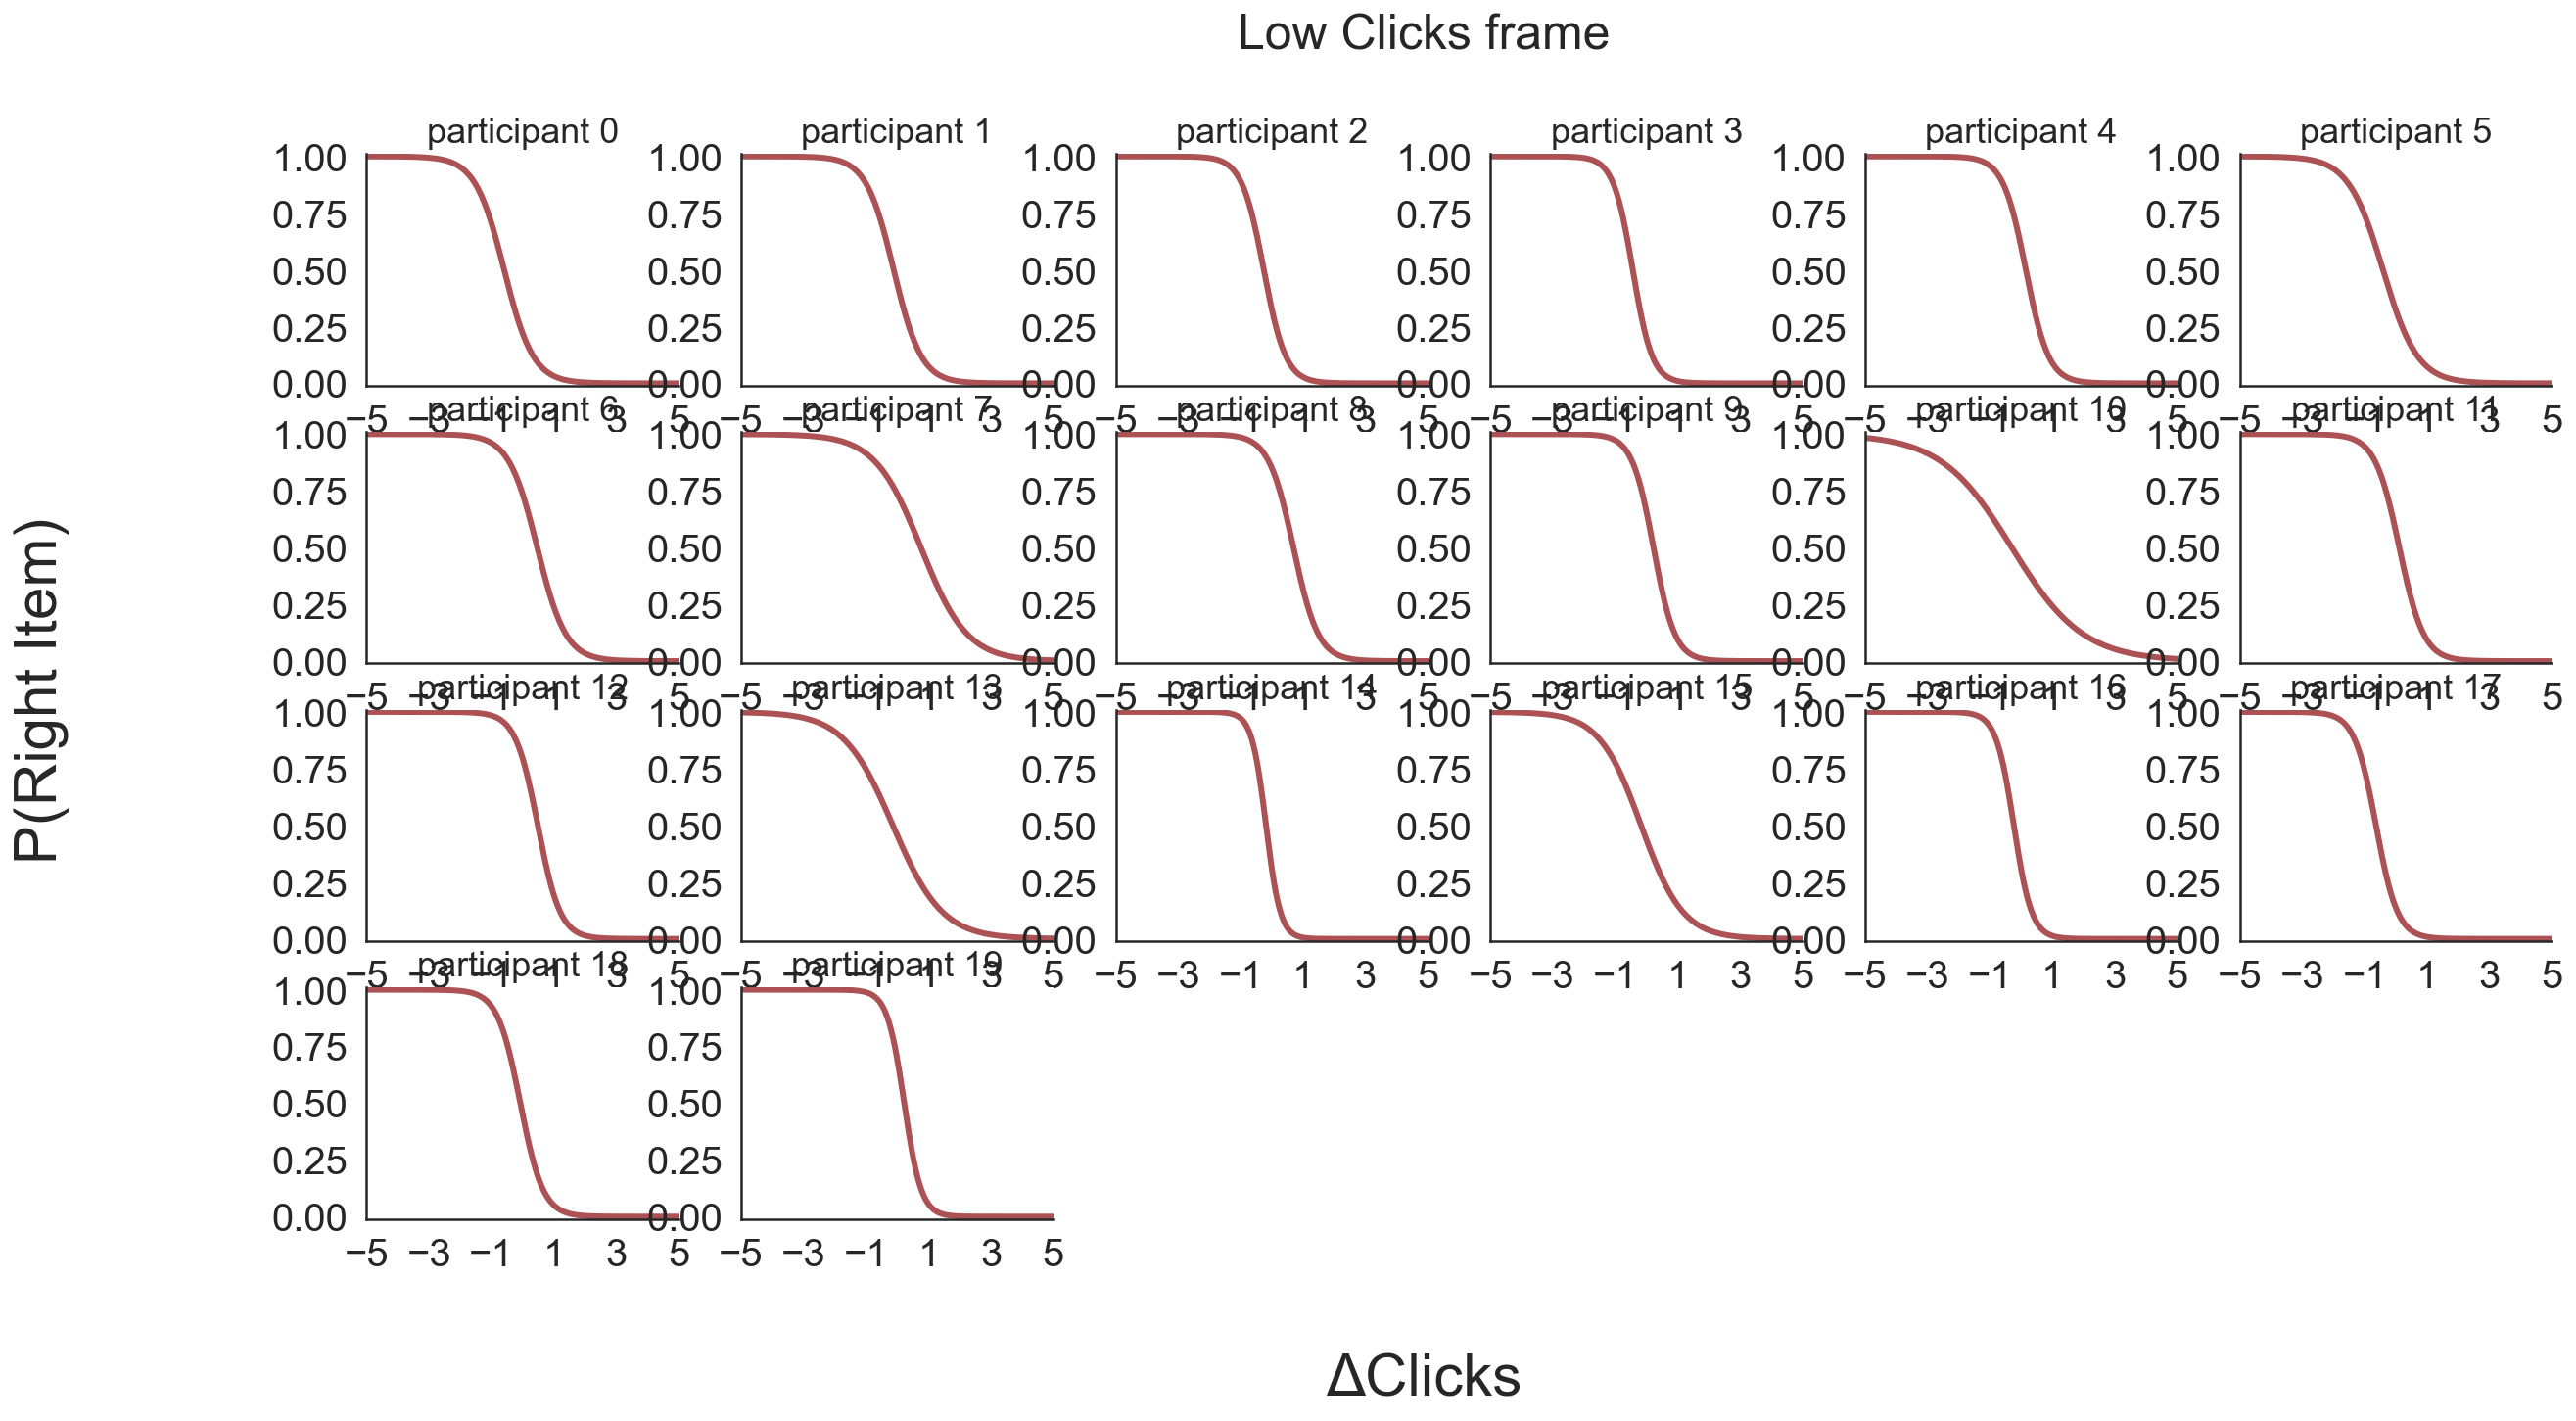

In [49]:
logisticplot_all_part( data=data_expLow, xaxis='zDFreq', yaxis='Choice', ylab='P(Right Item)', xlab= r'ΔClicks',
                 modlowcol='#AC5255', title='Low Clicks frame', parvar='part')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take preceden

Low measure:logit coef = [[1.37112194]] ; Intercept:  [-0.29824475]
high measure:logit coef = [[2.91435199]] ; Intercept:  [0.02379448]


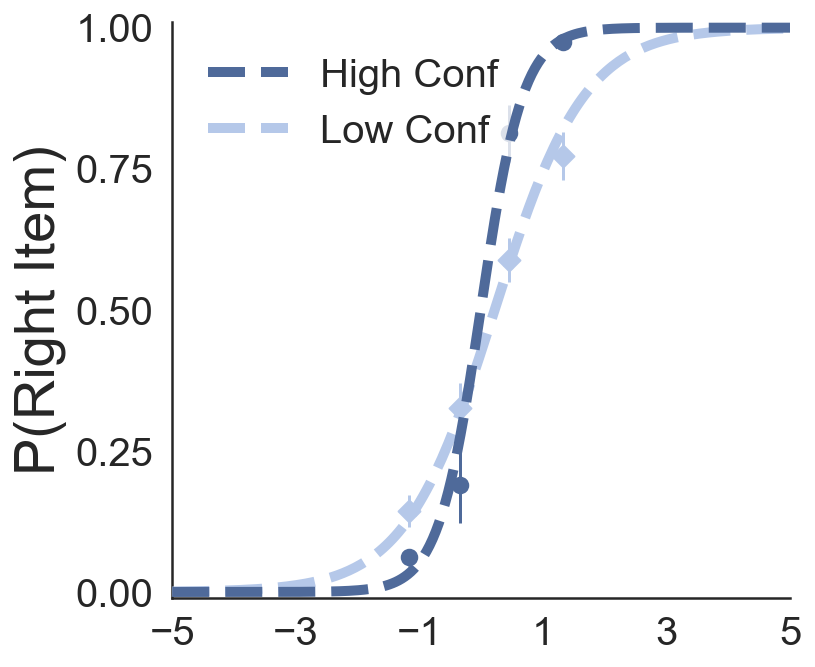

In [50]:
logisticplot_all('ConfSplit', 'High Conf', 'Low Conf', data=data_expHigh, xaxis='zDFreq', yaxis='Choice', ylab='P(Right Item)', xlab='',
                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take preceden

Low measure:logit coef = [[-1.47753734]] ; Intercept:  [-0.03635817]
high measure:logit coef = [[-2.62964786]] ; Intercept:  [-0.1153918]


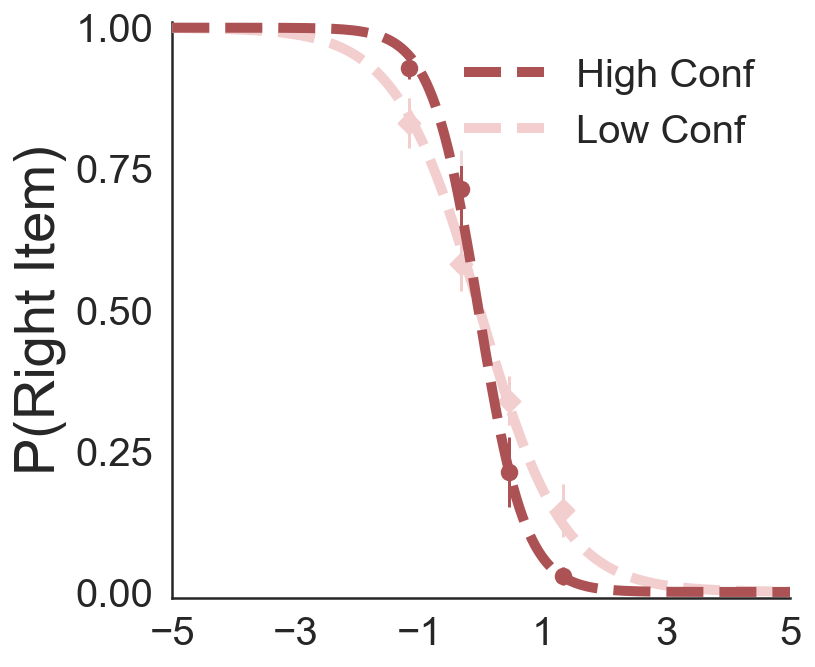

In [51]:
logisticplot_all('ConfSplit', 'High Conf', 'Low Conf', data=data_expLow, xaxis='zDFreq', yaxis='Choice', ylab='P(Right Item)', xlab='',
                 modhighcol='#AC5255', modlowcol='#F2CECF', title='empty', parvar='part')
plt.tight_layout()

Text(0.5, 1.0, 'High Click condition')

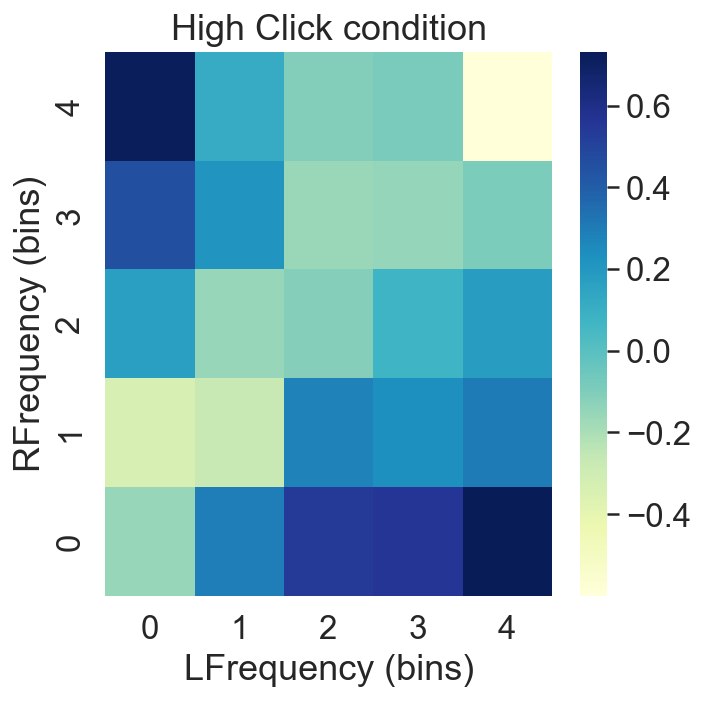

In [52]:
bin_num = 5
choiceFrameAll['LEv_bin'] = pd.to_numeric(pd.qcut(choiceFrameAll["freql"].values, bin_num , labels=range(bin_num)))
choiceFrameAll['REv_bin'] = pd.to_numeric(pd.qcut(choiceFrameAll["freqr"].values, bin_num , labels=range(bin_num)))

choFrameAll1 = choiceFrameAll.loc[choiceFrameAll['frame'] == 1]
df1 = choFrameAll1[['LEv_bin','REv_bin', 'zConf']]
rowIDs = df1['LEv_bin']
colIDs = df1['REv_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LEv_bin)
        y = int(df1.iloc[i].REv_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConf
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu")
ax.invert_yaxis()
plt.xlabel('LFrequency (bins)')
plt.ylabel('RFrequency (bins)')
plt.title('High Click condition')

Text(0.5, 1.0, 'Low Click condition')

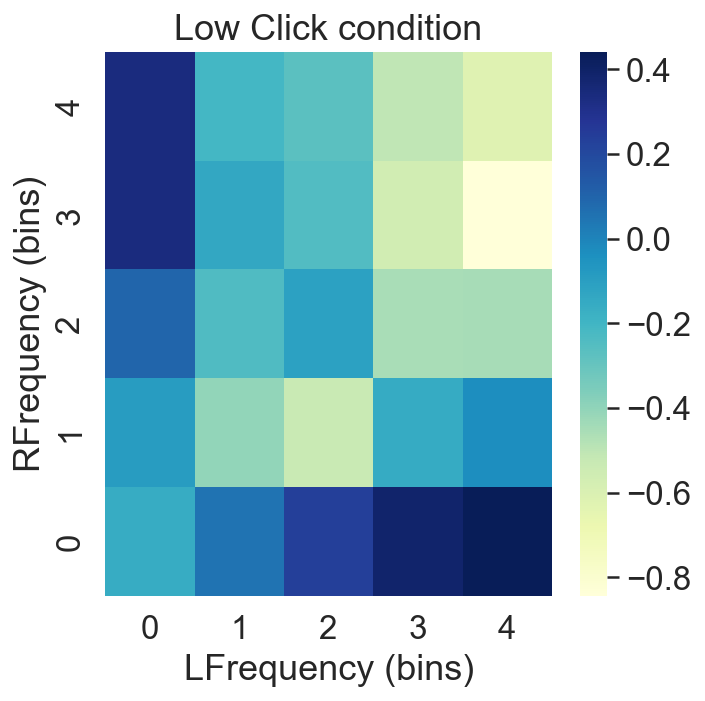

In [53]:

choFrameAll1 = choiceFrameAll.loc[choiceFrameAll['frame'] == 2]
df1 = choFrameAll1[['LEv_bin','REv_bin', 'zConf']]
rowIDs = df1['LEv_bin']
colIDs = df1['REv_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LEv_bin)
        y = int(df1.iloc[i].REv_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConf
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu")
ax.invert_yaxis()
plt.xlabel('LFrequency (bins)')
plt.ylabel('RFrequency (bins)')
plt.title('Low Click condition')

In [54]:
choiceFrameAll.columns

Index(['Session_Name_', 'Trial_Index_', 'expcond', 'trialn', 'noisecond',
       'whichfirstopt', 'noiseinl', 'noiseinr', 'freql', 'freqr', 'frame',
       'Frame_Name', 'Slider_X', 'Choice_SND1_Time', 'CONF', 'CONF_RT',
       'Choice_SND1', 'Choice_SND1_RT', 'TRIAL_N_LIVE', 'itm_1', 'itm', 'part',
       'logRT', 'zRT', 'zLogRT', 'zConf', 'zLFreq', 'zRFreq', 'Choice',
       'totFreq', 'dFreq', 'absDFreq', 'zTotFreq', 'zDFreq', 'zAbsDFreq',
       'choFreq', 'unchoFreq', 'zChoFreq', 'zUnchoFreq', 'ConfSplit',
       'correct', 'LEv_bin', 'REv_bin'],
      dtype='object')

# Pooled regressions

In [55]:
choiceFrameAll

,Session_Name_,Trial_Index_,expcond,trialn,noisecond,whichfirstopt,noiseinl,noiseinr,freql,freqr,...,zDFreq,zAbsDFreq,choFreq,unchoFreq,zChoFreq,zUnchoFreq,ConfSplit,correct,LEv_bin,REv_bin
0,pilot1,21,Experiment,118,1,0,1,1,4,1,...,-0.700649,-0.301511,1,4,-1.565104,-0.504956,0.0,1,1,0
1,pilot1,22,Experiment,134,1,0,1,1,5,9,...,0.934199,0.150756,5,9,-0.197537,1.270279,0.0,1,2,4
2,pilot1,23,Experiment,140,1,0,1,1,6,5,...,-0.233550,-1.206045,5,6,-0.197537,0.205138,0.0,1,2,1
3,pilot1,24,Experiment,177,1,0,1,1,10,6,...,-0.934199,0.150756,6,10,0.144354,1.625326,0.0,1,4,2
4,pilot1,25,Experiment,107,1,0,1,1,2,9,...,1.634848,1.507557,2,9,-1.223212,1.270279,1.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,Pilot24,196,Experiment,112,1,0,1,1,3,5,...,0.467099,-0.753778,3,5,-0.851419,-0.187343,0.0,1,1,1
3595,Pilot24,197,Experiment,94,1,0,1,1,1,5,...,0.934199,0.150756,1,5,-1.541758,-0.187343,1.0,1,0,1
3596,Pilot24,198,Experiment,178,1,0,1,1,10,7,...,-0.700649,-0.301511,7,10,0.529260,1.568996,0.0,1,4,3
3597,Pilot24,199,Experiment,120,1,0,1,1,4,3,...,-0.233550,-1.206045,3,4,-0.851419,-0.538611,0.0,1,1,1


In [56]:
%R -i choiceFrameAll
choiceFrameAll

,Session_Name_,Trial_Index_,expcond,trialn,noisecond,whichfirstopt,noiseinl,noiseinr,freql,freqr,...,zDFreq,zAbsDFreq,choFreq,unchoFreq,zChoFreq,zUnchoFreq,ConfSplit,correct,LEv_bin,REv_bin
0,pilot1,21,Experiment,118,1,0,1,1,4,1,...,-0.700649,-0.301511,1,4,-1.565104,-0.504956,0.0,1,1,0
1,pilot1,22,Experiment,134,1,0,1,1,5,9,...,0.934199,0.150756,5,9,-0.197537,1.270279,0.0,1,2,4
2,pilot1,23,Experiment,140,1,0,1,1,6,5,...,-0.233550,-1.206045,5,6,-0.197537,0.205138,0.0,1,2,1
3,pilot1,24,Experiment,177,1,0,1,1,10,6,...,-0.934199,0.150756,6,10,0.144354,1.625326,0.0,1,4,2
4,pilot1,25,Experiment,107,1,0,1,1,2,9,...,1.634848,1.507557,2,9,-1.223212,1.270279,1.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,Pilot24,196,Experiment,112,1,0,1,1,3,5,...,0.467099,-0.753778,3,5,-0.851419,-0.187343,0.0,1,1,1
3595,Pilot24,197,Experiment,94,1,0,1,1,1,5,...,0.934199,0.150756,1,5,-1.541758,-0.187343,1.0,1,0,1
3596,Pilot24,198,Experiment,178,1,0,1,1,10,7,...,-0.700649,-0.301511,7,10,0.529260,1.568996,0.0,1,4,3
3597,Pilot24,199,Experiment,120,1,0,1,1,4,3,...,-0.233550,-1.206045,3,4,-0.851419,-0.538611,0.0,1,1,1


In [57]:
%%R
# Separating the data for both conditions 
data_exp1_H <- choiceFrameAll[ which(choiceFrameAll$frame=='1'), ]
data_exp1_L <- choiceFrameAll[ which(choiceFrameAll$frame=='2'), ]

[1] "High BIC:"
[1] 1491.761
[1] "Low BIC:"
[1] 1588.897


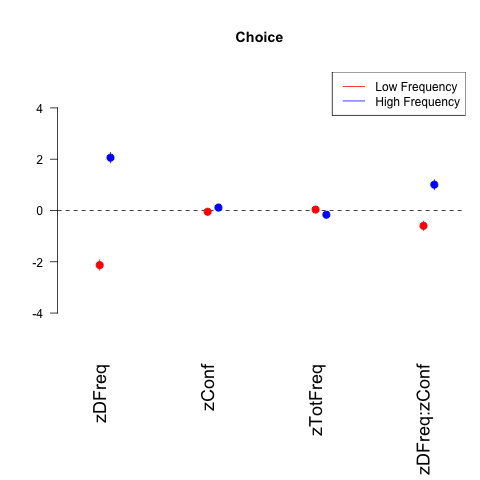

In [58]:
%%R
title_plot = "Choice "

ModelChoiceH_1 <- glm(Choice ~  zDFreq + zConf + zTotFreq + zDFreq:zConf  , data=data_exp1_H, family=binomial(link="logit"))
ModelChoiceL_1 <- glm(Choice ~   zDFreq + zConf + zTotFreq + zDFreq:zConf , data=data_exp1_L, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceH_1)
BIC2 = BIC(ModelChoiceL_1)

summary
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelChoiceL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-5, 5) ,main=title_plot)
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Frequency", "High Frequency"),col=c("red", "blue"), lty=1:1, cex=1)


Call:
glm(formula = zConf ~ zAbsDFreq + zRT + zTotFreq, data = data_exp1_H)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8255  -0.5315   0.1231   0.6056   4.5137  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.11839    0.02077   5.700  1.4e-08 ***
zAbsDFreq    0.24015    0.02105  11.407  < 2e-16 ***
zRT         -0.29212    0.02034 -14.362  < 2e-16 ***
zTotFreq    -0.06184    0.02071  -2.986  0.00287 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.7720805)

    Null deviance: 1708.5  on 1799  degrees of freedom
Residual deviance: 1386.7  on 1796  degrees of freedom
AIC: 4648.6

Number of Fisher Scoring iterations: 2


Call:
glm(formula = zConf ~ zAbsDFreq + zRT + zTotFreq, data = data_exp1_L)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4676  -0.6338   0.0996   0.6308   2.8458  

Coefficients:
            Estimate Std. 

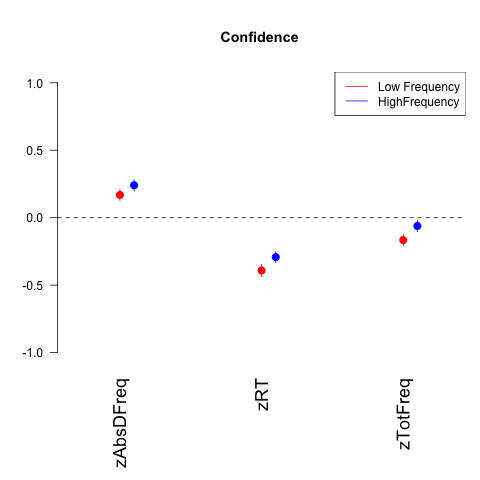

In [59]:
%%R
title_plot = "Confidence "

ModelChoiceH_1 <- glm(zConf ~  zAbsDFreq + zRT + zTotFreq  , data=data_exp1_H)
ModelChoiceL_1 <- glm(zConf ~  zAbsDFreq + zRT + zTotFreq  , data=data_exp1_L)

BIC1 = BIC(ModelChoiceH_1)
BIC2 = BIC(ModelChoiceL_1)


print(summary(ModelChoiceH_1))
print(summary(ModelChoiceL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)


print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelChoiceL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Frequency", "HighFrequency"),col=c("red", "blue"), lty=1:1, cex=1)


Call:
glm(formula = zConf ~ zAbsDFreq + zRT + zChoFreq + zUnchoFreq, 
    data = data_exp1_H)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1288  -0.5280   0.1068   0.5831   4.0740  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.10057    0.03145  -3.198  0.00141 ** 
zAbsDFreq    0.06148    0.02842   2.163  0.03065 *  
zRT         -0.26333    0.02014 -13.075  < 2e-16 ***
zChoFreq     0.19861    0.03088   6.432 1.61e-10 ***
zUnchoFreq  -0.26290    0.02817  -9.331  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.7382888)

    Null deviance: 1708.5  on 1799  degrees of freedom
Residual deviance: 1325.2  on 1795  degrees of freedom
AIC: 4569

Number of Fisher Scoring iterations: 2


Call:
glm(formula = zConf ~ zAbsDFreq + zRT + zChoFreq + zUnchoFreq, 
    data = data_exp1_L)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  


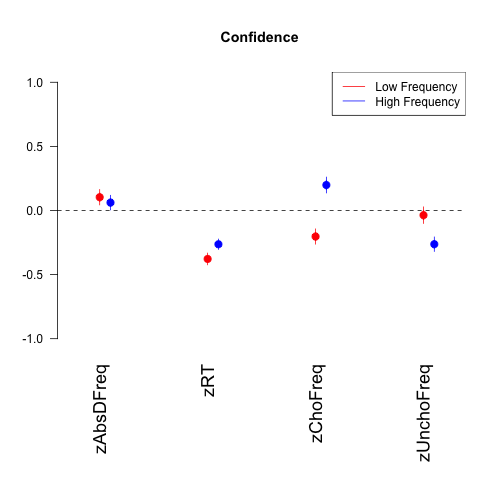

In [60]:
%%R
title_plot = "Confidence "

ModelChoiceH_1 <- glm(zConf ~  zAbsDFreq + zRT + zChoFreq + zUnchoFreq  , data=data_exp1_H)
ModelChoiceL_1 <- glm(zConf ~  zAbsDFreq + zRT + zChoFreq + zUnchoFreq , data=data_exp1_L)

BIC1 = BIC(ModelChoiceH_1)
BIC2 = BIC(ModelChoiceL_1)

print(summary(ModelChoiceH_1))
print(summary(ModelChoiceL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelChoiceL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Frequency", "High Frequency"),col=c("red", "blue"), lty=1:1, cex=1)


Call:
glm(formula = zLogRT ~ zAbsDFreq + zTotFreq, data = data_exp1_H)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3642  -0.7174  -0.0543   0.6430   5.5596  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.11701    0.02397  -4.881 1.15e-06 ***
zAbsDFreq   -0.24667    0.02397 -10.290  < 2e-16 ***
zTotFreq     0.02277    0.02397   0.950    0.342    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.982584)

    Null deviance: 1782.2  on 1709  degrees of freedom
Residual deviance: 1677.3  on 1707  degrees of freedom
  (90 observations deleted due to missingness)
AIC: 4827.7

Number of Fisher Scoring iterations: 2


Call:
glm(formula = zLogRT ~ zAbsDFreq + zTotFreq, data = data_exp1_L)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9257  -0.6765  -0.0245   0.6349   3.2806  

Coefficients:
            Estimate Std. Error t value Pr(

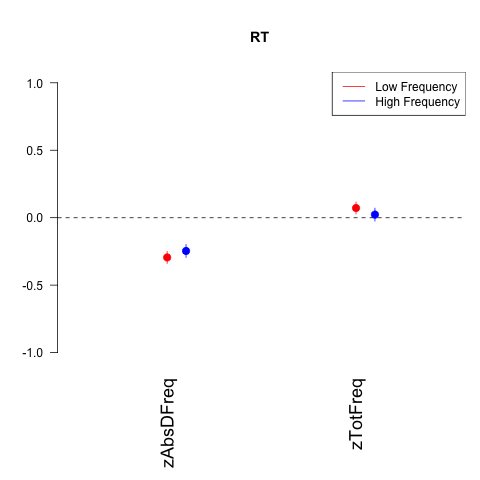

In [61]:
%%R
title_plot = "RT "

ModelChoiceH_1 <- glm(zLogRT ~  zAbsDFreq  + zTotFreq  , data=data_exp1_H)
ModelChoiceL_1 <- glm(zLogRT ~  zAbsDFreq  + zTotFreq, data=data_exp1_L)

BIC1 = BIC(ModelChoiceH_1)
BIC2 = BIC(ModelChoiceL_1)

print(summary(ModelChoiceH_1))
print(summary(ModelChoiceL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelChoiceL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Frequency", "High Frequency"),col=c("red", "blue"), lty=1:1, cex=1)


Call:
glm(formula = zLogRT ~ zAbsDFreq + zChoFreq + zUnchoFreq, data = data_exp1_H)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2891  -0.6878  -0.0434   0.6214   5.6111  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10258    0.03622   2.832  0.00468 ** 
zAbsDFreq   -0.06422    0.03282  -1.957  0.05056 .  
zChoFreq    -0.22647    0.03532  -6.412 1.85e-10 ***
zUnchoFreq   0.23359    0.03233   7.225 7.53e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9477862)

    Null deviance: 1782.2  on 1709  degrees of freedom
Residual deviance: 1616.9  on 1706  degrees of freedom
  (90 observations deleted due to missingness)
AIC: 4767.1

Number of Fisher Scoring iterations: 2


Call:
glm(formula = zLogRT ~ zAbsDFreq + zChoFreq + zUnchoFreq, data = data_exp1_L)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8697  -0.6641  -0.019

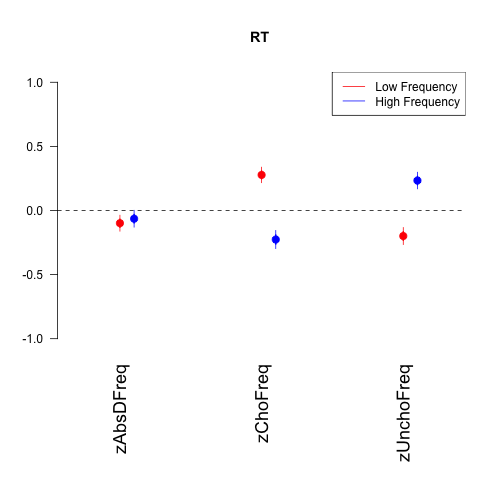

In [62]:
%%R
title_plot = "RT "

ModelChoiceH_1 <- glm(zLogRT ~  zAbsDFreq  + zChoFreq + zUnchoFreq  , data=data_exp1_H)
ModelChoiceL_1 <- glm(zLogRT ~  zAbsDFreq  + zChoFreq + zUnchoFreq , data=data_exp1_L)

BIC1 = BIC(ModelChoiceH_1)
BIC2 = BIC(ModelChoiceL_1)

print(summary(ModelChoiceH_1))
print(summary(ModelChoiceL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelChoiceL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Frequency", "High Frequency"),col=c("red", "blue"), lty=1:1, cex=1)

# hierarchical models

## Choice

In [63]:
from pymer4.models import Lmer


In [64]:
data_expLow = data_expLow.drop(columns = ['DVBin2'])
data_expHigh = data_expHigh.drop(columns = ['DVBin2'])


In [65]:
from pymer4.models import Lmer

regFormula1 = "Choice ~  zDFreq + zConf + zTotFreq + zDFreq:zConf + (zDFreq + zConf + zTotFreq + zDFreq:zConf|part) "

model1 = Lmer(regFormula1, data=data_expHigh, family = 'binomial')
model2 = Lmer(regFormula1, data=data_expLow, family = 'binomial')

model1.fit()
model2.fit()

table_data1 = model1.coefs.T
table_data2 = model2.coefs.T

par_table_data1 = model1.fixef
par_table_data2 = model2.fixef

boundary (singular) fit: see ?isSingular 

Formula: Choice~zDFreq+zConf+zTotFreq+zDFreq:zConf+(zDFreq+zConf+zTotFreq+zDFreq:zConf|part)

Family: binomial	 Inference: parametric

Number of observations: 1800	 Groups: {'part': 20.0}

Log-likelihood: -677.388 	 AIC: 1394.775

Random effects:

              Name    Var    Std
part   (Intercept)  0.663  0.814
part        zDFreq  0.680  0.825
part         zConf  0.141  0.375
part      zTotFreq  0.022  0.150
part  zDFreq:zConf  0.265  0.515

              IV1           IV2   Corr
part  (Intercept)        zDFreq  0.012
part  (Intercept)         zConf  0.991
part  (Intercept)      zTotFreq  0.656
part  (Intercept)  zDFreq:zConf -0.016
part       zDFreq         zConf  0.139
part       zDFreq      zTotFreq  0.584
part       zDFreq  zDFreq:zConf  0.463
part        zConf      zTotFreq  0.704
part        zConf  zDFreq:zConf  0.008
part     zTotFreq  zDFreq:zConf  0.688

Fixed effects:

Model failed to converge with max|grad| = 0.0534544 (tol = 0.001

In [66]:
table_data1

,(Intercept),zDFreq,zConf,zTotFreq,zDFreq:zConf
Estimate,-0.163789,2.59859,0.142254,-0.172242,1.21364
2.5_ci,-0.557761,2.12913,-0.0836221,-0.310525,0.86729
97.5_ci,0.230183,3.06806,0.36813,-0.0339579,1.56
SE,0.20101,0.239529,0.115245,0.0705542,0.176714
OR,0.848921,13.4448,1.15287,0.841776,3.36572
OR_2.5_ci,0.57249,8.40751,0.919779,0.733062,2.38045
OR_97.5_ci,1.25883,21.5002,1.44503,0.966612,4.7588
Prob,0.459144,0.930771,0.535504,0.457046,0.770943
Prob_2.5_ci,0.364066,0.893702,0.479107,0.422987,0.704182
Prob_97.5_ci,0.557293,0.955556,0.591007,0.491511,0.826353


In [67]:
table_data2

,(Intercept),zDFreq,zConf,zTotFreq,zDFreq:zConf
Estimate,-0.20929,-2.79777,-0.177306,0.0128883,-0.810546
2.5_ci,-0.722456,-3.2542,-0.423851,-0.186101,-1.10742
97.5_ci,0.303877,-2.34133,0.0692378,0.211877,-0.513674
SE,0.261824,0.232877,0.12579,0.101527,0.151468
OR,0.81116,0.0609461,0.837523,1.01297,0.444615
OR_2.5_ci,0.485558,0.0386119,0.654522,0.83019,0.330411
OR_97.5_ci,1.3551,0.0961991,1.07169,1.236,0.598293
Prob,0.447868,0.0574451,0.455789,0.503222,0.307774
Prob_2.5_ci,0.326852,0.0371764,0.395596,0.453609,0.248353
Prob_97.5_ci,0.57539,0.087757,0.517303,0.552772,0.374333


([<matplotlib.axis.XTick at 0x7fb04151d278>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'ΔClicks'),
  Text(3.25, 0, 'Conf'),
  Text(4.25, 0, 'ΣClicks'),
  Text(5.25, 0, 'ΔClicks x\nConf')])

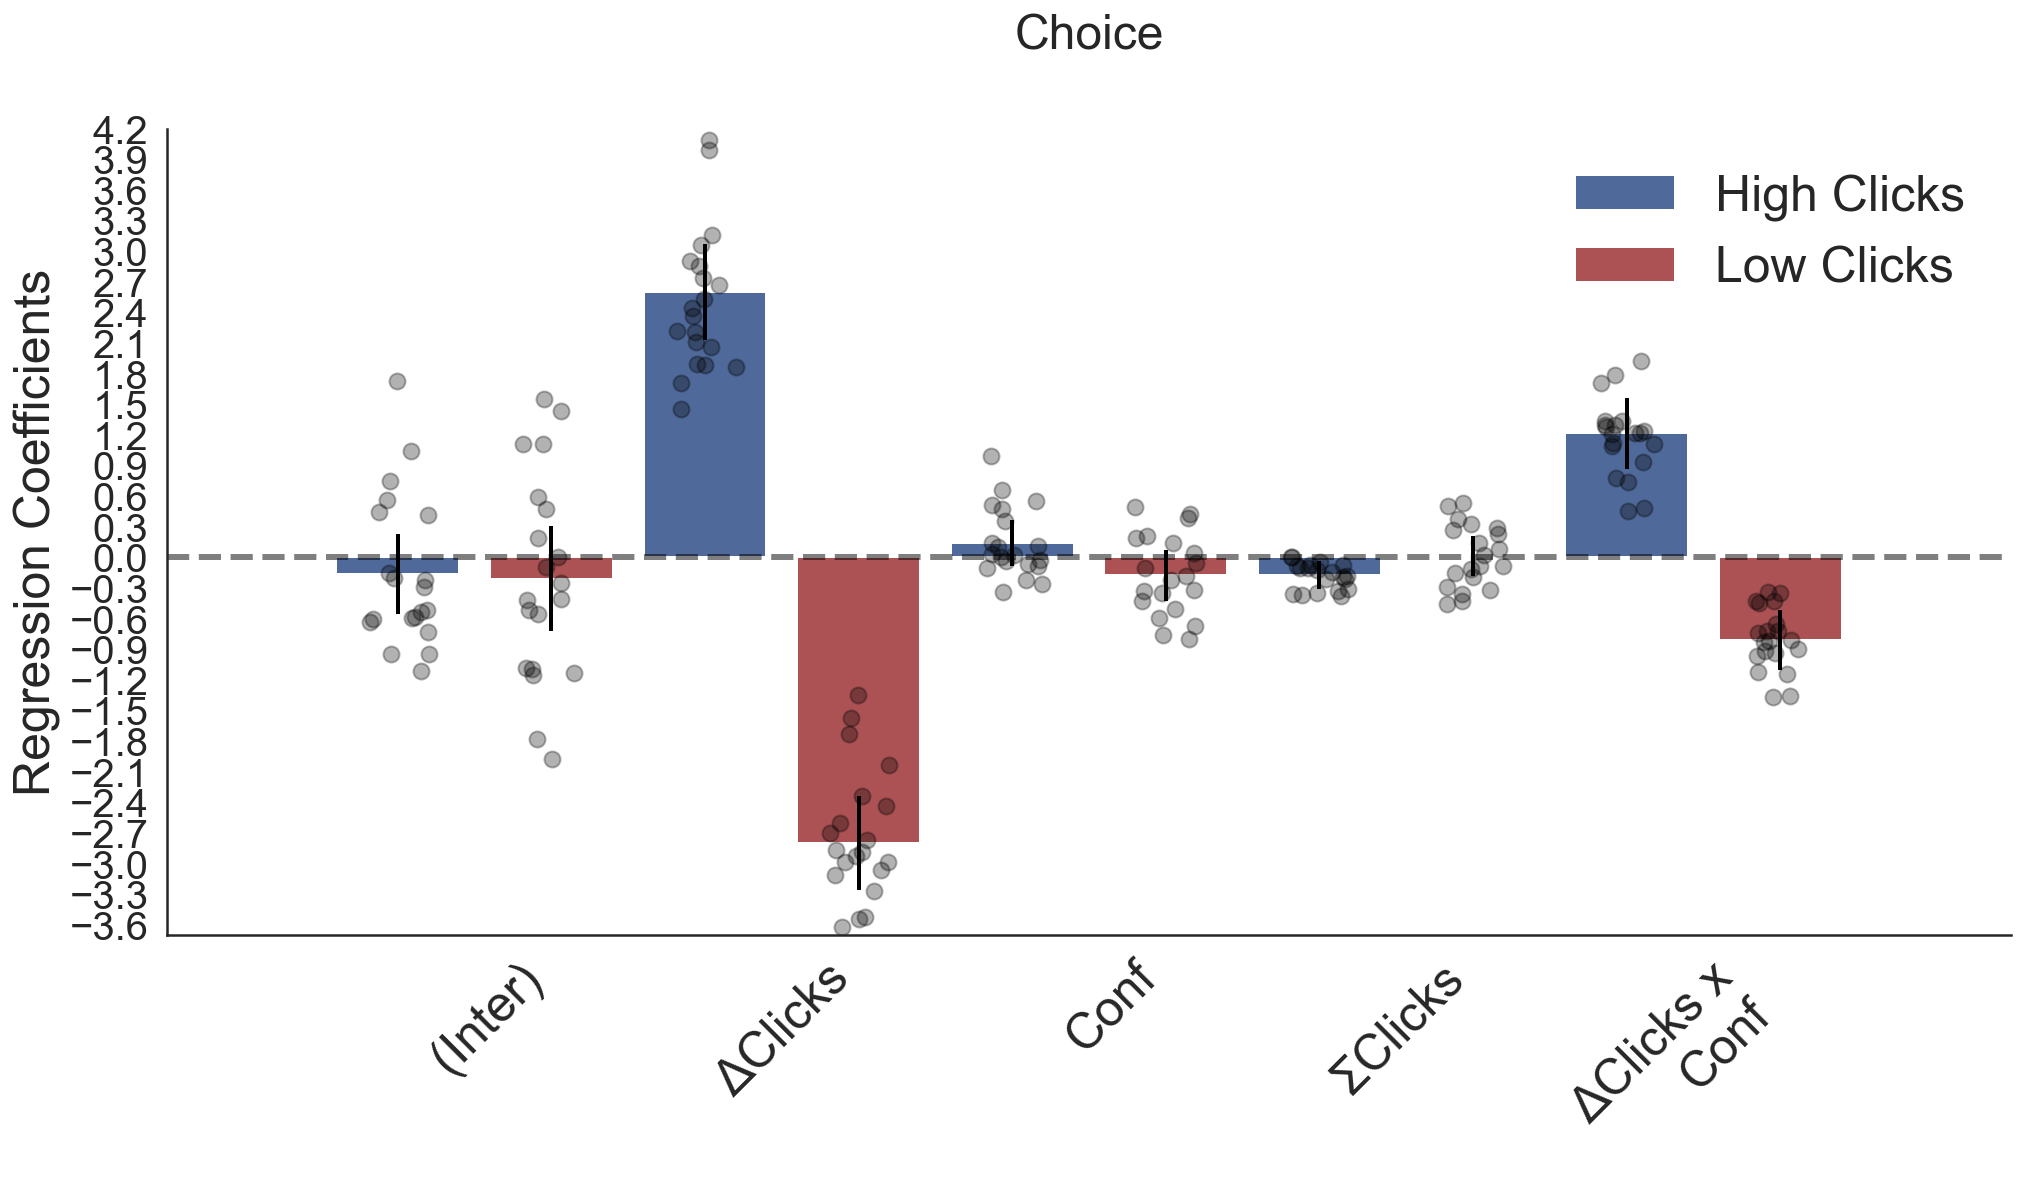

In [68]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Choice', size='big',ymultiple=0.3, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
#plt.ylim(-0.4, 0.4)

#plt.xlim(-, 0.4)

plt.xticks([1.25,2.25,3.25, 4.25,5.25],['(Inter)','ΔClicks','Conf','ΣClicks','ΔClicks x\nConf'], rotation=45)

## Confidence

In [69]:
regFormula1 = "zConf ~    zAbsDFreq + zRT + zTotFreq + (zAbsDFreq + zRT + zTotFreq|part) "

model1 = Lmer(regFormula1, data=data_expHigh)
model2 = Lmer(regFormula1, data=data_expLow)

model1.fit()
model2.fit()

table_data1 = model1.coefs.T
table_data2 = model2.coefs.T

par_table_data1 = model1.fixef
par_table_data2 = model2.fixef

Model failed to converge with max|grad| = 0.00742364 (tol = 0.002, component 1) 

Formula: zConf~zAbsDFreq+zRT+zTotFreq+(zAbsDFreq+zRT+zTotFreq|part)

Family: gaussian	 Inference: parametric

Number of observations: 1800	 Groups: {'part': 20.0}

Log-likelihood: -2269.509 	 AIC: 4539.017

Random effects:

                 Name    Var    Std
part      (Intercept)  0.022  0.147
part        zAbsDFreq  0.020  0.142
part              zRT  0.023  0.153
part         zTotFreq  0.025  0.159
Residual               0.686  0.828

              IV1        IV2   Corr
part  (Intercept)  zAbsDFreq -0.386
part  (Intercept)        zRT  0.509
part  (Intercept)   zTotFreq  0.545
part    zAbsDFreq        zRT  0.089
part    zAbsDFreq   zTotFreq -0.658
part          zRT   zTotFreq  0.343

Fixed effects:

boundary (singular) fit: see ?isSingular 

Formula: zConf~zAbsDFreq+zRT+zTotFreq+(zAbsDFreq+zRT+zTotFreq|part)

Family: gaussian	 Inference: parametric

Number of observations: 1799	 Groups: {'part': 20.0}

L

In [70]:
table_data1

,(Intercept),zAbsDFreq,zRT,zTotFreq
Estimate,0.104784,0.22777,-0.32127,-0.0544117
2.5_ci,0.0295293,0.154077,-0.399912,-0.133934
97.5_ci,0.180038,0.301463,-0.242628,0.0251102
SE,0.0383957,0.0375993,0.0401241,0.0405731
DF,19.0375,19.3569,19.6209,18.9007
T-stat,2.72904,6.05783,-8.00691,-1.34108
P-val,0.0133105,7.33636e-06,1.31768e-07,0.19579
Sig,*,***,***,


In [71]:
table_data2

,(Intercept),zAbsDFreq,zRT,zTotFreq
Estimate,-0.118399,0.146287,-0.448042,-0.160432
2.5_ci,-0.193238,0.0861007,-0.55631,-0.221354
97.5_ci,-0.0435608,0.206473,-0.339774,-0.0995105
SE,0.0381836,0.0307078,0.0552396,0.031083
DF,18.9731,21.8952,14.078,19.8687
T-stat,-3.10079,4.76384,-8.11088,-5.16141
P-val,0.00589194,9.45799e-05,1.12297e-06,4.84367e-05
Sig,**,***,***,***


([<matplotlib.axis.XTick at 0x7fb05163c6d8>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'ΔClicks'),
  Text(3.25, 0, 'Conf'),
  Text(4.25, 0, 'ΣClicks'),
  Text(5.25, 0, 'ΔClicks x\nConf')])

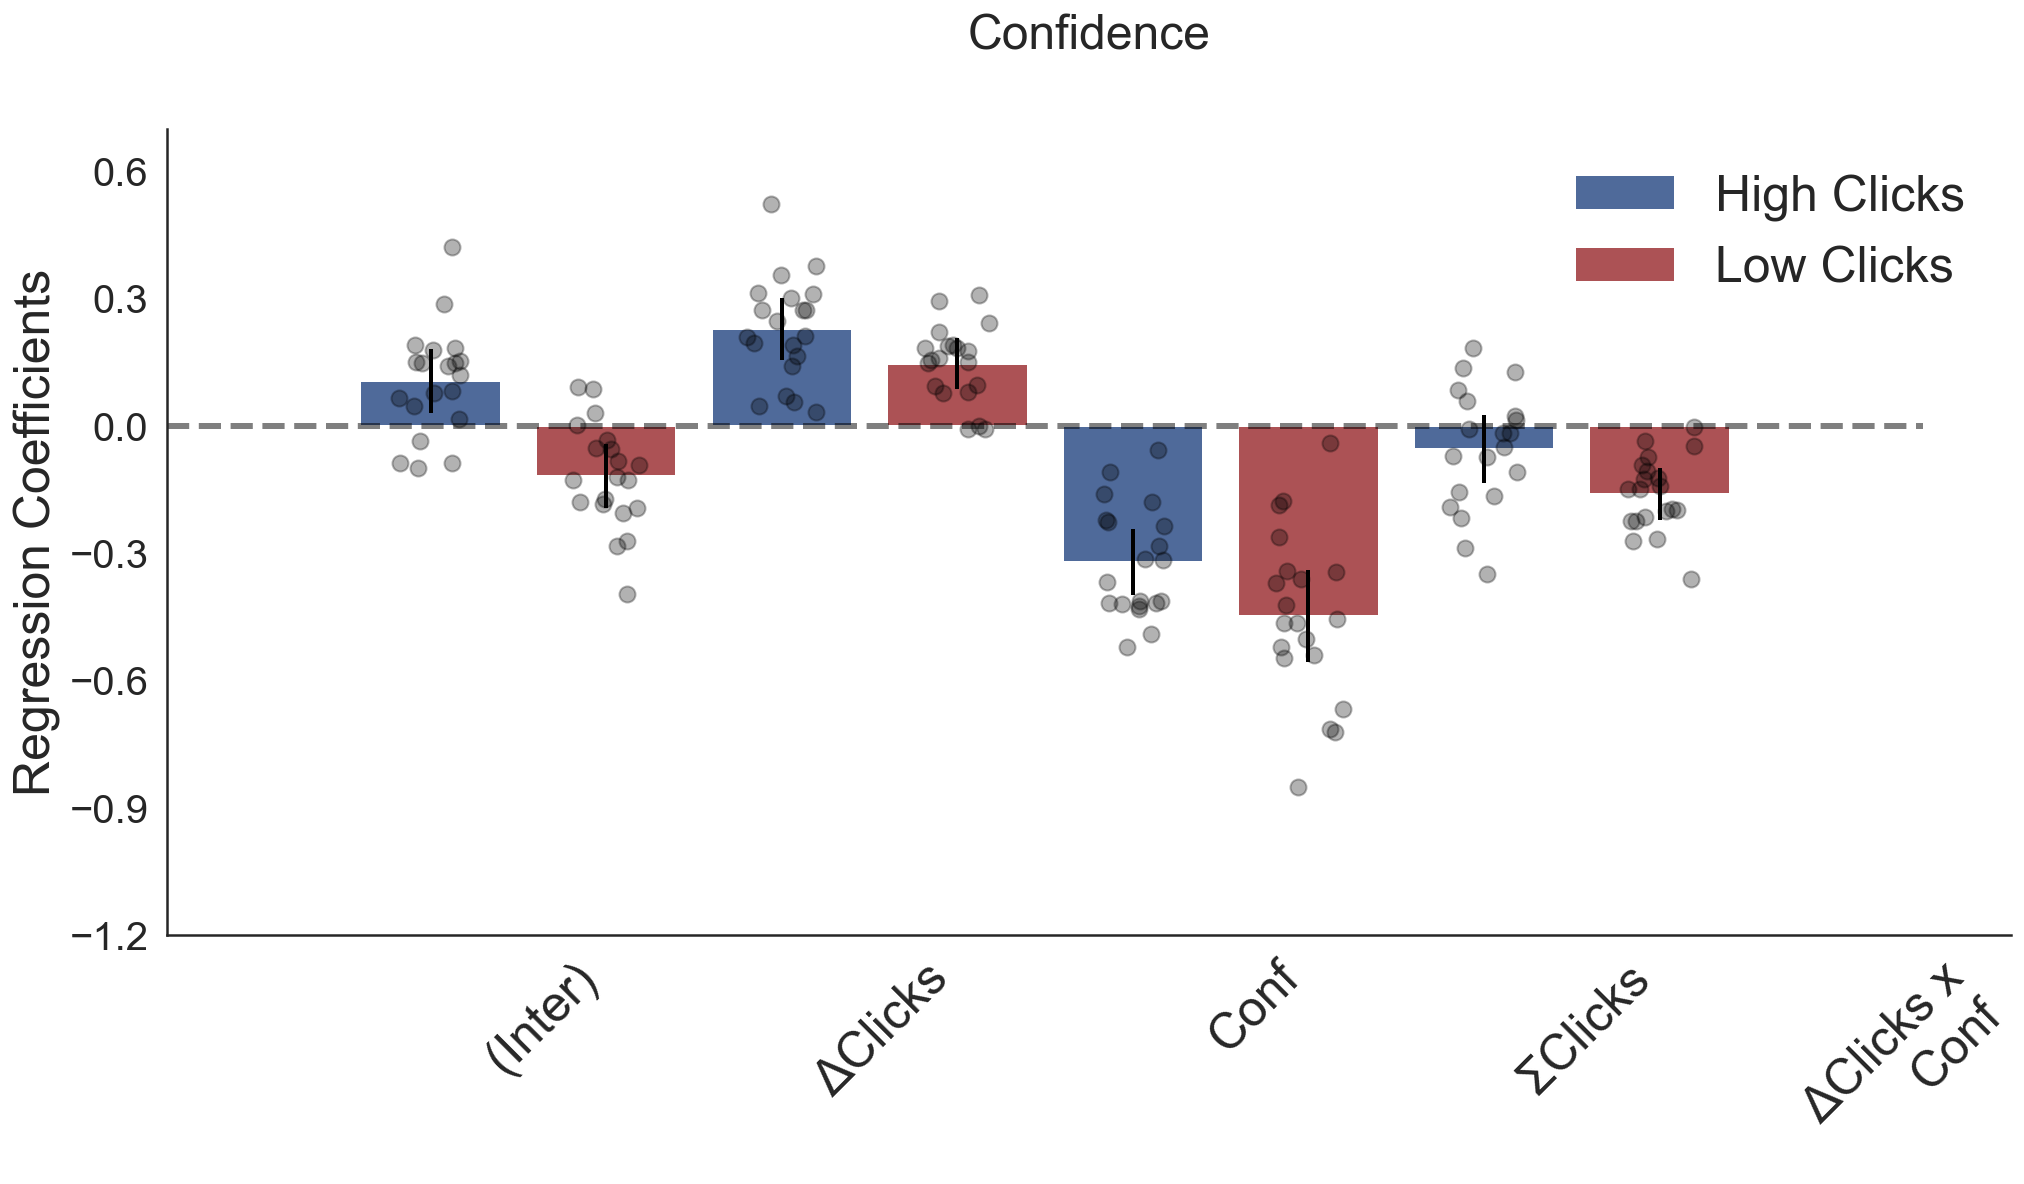

In [72]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Confidence', size='big',ymultiple=0.3, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
#plt.ylim(-0.4, 0.4)
plt.xticks([1.25,2.25,3.25, 4.25,5.25],['(Inter)','ΔClicks','Conf','ΣClicks','ΔClicks x\nConf'], rotation=45)

In [73]:
stats.ttest_rel(par_table_data1.zTotFreq.values,par_table_data2.zTotFreq.values)

Ttest_relResult(statistic=4.606328369194422, pvalue=0.00019268395597056939)

In [74]:
stats.ttest_rel(par_table_data1.zRT.values,par_table_data2.zRT.values)

Ttest_relResult(statistic=2.213383182770813, pvalue=0.03930487885189276)

In [75]:
stats.ttest_rel(par_table_data1.zAbsDFreq.values,par_table_data2.zAbsDFreq.values)

Ttest_relResult(statistic=3.485738314568471, pvalue=0.0024741216811172313)

In [76]:
print(np.mean(par_table_data1.zTotFreq.values))
print(np.mean(par_table_data2.zTotFreq.values))

-0.05441171095555836
-0.16043210124013707


## -- [end ] 

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


In [3]:
%%R
library(lme4)
#library(car)
library(optimx)
library(ggplot2)
library(MASS)
#library(broom)

#library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

R[write to console]: Loading required package: Matrix

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

R[write to console]: 
arm (Version 1.10-1, built: 2018-4-12)


R[write to console]: Working directory is /Users/pradyumna/Documents/GiTs/pupilPEB2021/Code PupilClicks


R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser




In [4]:
%%R
# Use in case the libraries are not available in the system
#install.packages('lme4')
#install.packages("car")
#install.packages("ggplot2")
#install.packages("broom")
#install.packages("arm")
#install.packages("ggplot2")
#install.packages("optimx")
#install.packages("multcomp")

NULL


<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [5]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(10,10))

    for x in participants:
        # defining the sub figures
     #       sub={}
     #       sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
     #       sns.kdeplot(data.loc[data['part'] == x, var].values, ax = sub['%s' % x], shade=True)
     #       #if rug==True:
     #       #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
     #       sub['%s' % x].set_title('participant %s' % x)
     #       #sub['%s' % x].set_xlim(xlim)

            sns.kdeplot(data.loc[data['part'] == x, var].values, shade=True)

            
            order += 1
    fig.suptitle(title, fontsize = 25)


### Split variable into participantwise quantiles

In [6]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

### Full simple logistic graph

In [7]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(6,5))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high,'r--', color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low,'r--', color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=28)
    sub.set_xlabel(xlab, fontsize=28)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    leg = sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()
    
    return plt

### Full simple logistic graph (no bins)

In [8]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()

### Regression Coefficients Plot

In [9]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [10]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [11]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [12]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [13]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [14]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(5, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [15]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(5,5))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('part. %s' % x, fontsize = 50 )


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6,linestyle='-')
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5,linestyle='-')
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='-')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=30)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4,fontsize=50)       

    fig.text(0.5, -0.01, xlab, ha='center',fontsize = 70)
    fig.text(-0.01, 0.5, ylab, va='center', rotation='vertical',fontsize = 70)
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [16]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [17]:
def splitBy(data_exp1, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'tGSF','tDDT']):
    
    median_matrix=[]
    median_matrix_aux=[]
    median_matrix_aux_cond=[]
    Split_cols = []
    
    for h in range(len(Splits_variables)):
        median_matrix=[]
        for i in unique(data_exp1["part"]):
            median_matrix_aux=[]
    
            for j in unique(data_exp1["frame"]):
                #median_matrix_aux_cond=[]
    
                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
                Splitdata = data_exp1.loc[data_exp1['part'] == i]
                Splitdata = Splitdata.loc[Splitdata['frame'] == j]
                
                # Select the column to split
                Splitdata = Splitdata.loc[:,['TRIAL_N_LIVE',Splits_variables[h]]]
                SplitSort = Splitdata.values
                # Sort for confidence column
                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
                #print(SplitSort)
                lenPart = len(Splitdata)
                #print(lenPart)
                # Generate column with median order
                median_low = [0] * int (lenPart/2)
    
                if len(SplitSort) != 2*len(median_low):
                    median_high=  [1] * int(len(SplitSort)-len(median_low))
                else: median_high = [1] * int (lenPart/2)
            
                median_split_order = median_low + median_high
                #Attach split median order column (1 and 0)
                median_aux= np.column_stack((SplitSort,median_split_order))
                #Sort back to trial number
                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
                #print(len(SplitSorted))
                
                for kk in range(len(SplitSorted)): 
                    if len(median_matrix_aux) == 0 :
                        median_matrix_aux = SplitSorted[0]
                    else:
                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
            
            
            #print(["participant "+ str(i)+ " done"])
            # sort after adding both conditions    
            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
            
            #Extract only the column with the median split information
            median_matrix_aux = median_matrix_aux[:,2]
            
            #append to median matrix for the participants
            for k in range(len(median_matrix_aux)):    
                median_matrix.append(median_matrix_aux [k])
        
        median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
        #print(len (median_matrix))
        #add new column (new split variable columns) to the split matrix
        if  h == 0:
            Split_cols = median_matrix
        else:
            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)   
    
    return Split_cols

In [18]:
# Add asterisk
def add_star(RT_like, RT_dislike):
    x1, x2 = 0, 1   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
    
    
# Add asterisk
def add_star1(RT_like, RT_dislike, p):
    
    if p<0.001:
        star_text = '***'
    elif p<0.01:
        star_text = '**'
    elif p<0.05:
        star_text = '*'
        
    x1, x2 = 1, 2   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [19]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value



def add_violin(all_arr):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch('//')
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)
  #  parts2 = plt.violinplot( all_arr
   #                         , showmeans=False, showextrema=False, showmedians=False)
  #  for i, face in enumerate(parts2['bodies']):
       # face.set_hatch('//')
       # face.set_facecolor('None')
   #     face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) 
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    

In [20]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
 
    # a list of all the participants in the dataset
    participants = data.loc[:, parvar].unique()
    fig = figure(figsize=(20,10))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/6+1), 6, order)

            data_in = data.loc[data[parvar] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()

In [21]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=True, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0, hatch2 ='',labels = ['',''] ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    bar_sep= 0.25
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=24)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    XLim = (0, len(regtable1.columns)+1  )
    YLim = (round_to_5(np.min([np.min(mixtable1),np.min(mixtable2)]))-0.2, round_to_5(np.max([np.max(mixtable1),np.max(mixtable2)]))+0.2)
   # else:
   #     XLim = (0, len(regtable1.columns) +1)
   #     YLim = (round_to_5(np.min([np.min(mixtable1),np.min(mixtable2)]))-0.2, round_to_5(np.max([np.max(mixtable1),np.max(mixtable2)]))+0.2)
   # if ylimits != ():
    #    YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    
    Coefficients = regtable1.columns
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        # Plot condition 1
        position += 1
        ax.bar(position-bar_sep, regtable1.loc['Estimate', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-bar_sep, regtable1.loc['Estimate', Coefficient],
                    yerr=regtable1.loc['SE', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+bar_sep, regtable2.loc['Estimate', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+bar_sep, regtable2.loc['Estimate', Coefficient],
                    yerr=regtable2.loc['SE', Coefficient]*1.96, lw=2, color='#000000')


   



   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    coef_num1 = range(0,len(mixtable1)) 
    for i in coef_num1:
        # Plot dots condition 1
        part_coefs = mixtable1.iloc[i]
        position_parts= range(len(part_coefs))
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(np.sum([list(position_parts) ,1 -  bar_sep+jittr], axis = 0), part_coefs.values, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        
    coef_num2 = range(0,len(mixtable2)) 
        
    for i in coef_num2:       
        
        # Plot dots condition 1
        part_coefs = mixtable2.iloc[i]
        position_parts= range(len(part_coefs))
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(np.sum([list(position_parts) , 1 +bar_sep-jittr], axis = 0), part_coefs.values, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, len(regtable1.columns)+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label

    ax.set_xticklabels(regtable1.columns, rotation=0)        
   
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=25)
    ax.xaxis.set_tick_params(labelsize=25)

    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    

    patch1 = mpatches.Patch(facecolor=colourlist1[position-1],hatch=r'', label=labels[0])
    patch2 = mpatches.Patch(facecolor=colourlist2[position-1],hatch=r'', label=labels[1])

    leg = plt.legend(handles=[patch1,patch2],fontsize=25)
    leg.get_frame().set_facecolor('none')
    leg.get_frame().set_linewidth(0.0)
    
    
    sns.despine()

In [22]:
#def splitBy(data_exp1, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'tGSF','tDDT']):
#    
#    median_matrix=[]
#    median_matrix_aux=[]
#    median_matrix_aux_cond=[]
#    Split_cols = []
#    
#    for h in range(len(Splits_variables)):
#        median_matrix=[]
#        for i in unique(data_exp1["part"]):
#            median_matrix_aux=[]
#    
#            for j in unique(data_exp1["BlockCond"]):
#                #median_matrix_aux_cond=[]
#    
#                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
#                Splitdata = data_exp1.loc[data_exp1['Part'] == i]
#                Splitdata = Splitdata.loc[Splitdata['BlockCond'] == j]
#                
#                # Select the column to split
#                Splitdata = Splitdata.loc[:,['TrialN',Splits_variables[h]]]
#                SplitSort = Splitdata.values
#                # Sort for confidence column
#                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
#                #print(SplitSort)
#                lenPart = len(Splitdata)
#                #print(lenPart)
#                # Generate column with median order
#                median_low = [0] * int (lenPart/2)
#    
#                if len(SplitSort) != 2*len(median_low):
#                    median_high=  [1] * int(len(SplitSort)-len(median_low))
#                else: median_high = [1] * int (lenPart/2)
#            
#                median_split_order = median_low + median_high
#                #Attach split median order column (1 and 0)
#                median_aux= np.column_stack((SplitSort,median_split_order))
#                #Sort back to trial number
#                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
#                #print(len(SplitSorted))
#                
#                for kk in range(len(SplitSorted)): 
#                    if len(median_matrix_aux) == 0 :
#                        median_matrix_aux = SplitSorted[0]
#                    else:
#                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
#            
#            
#            #print(["participant "+ str(i)+ " done"])
#            # sort after adding both conditions    
#            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
#            
#            #Extract only the column with the median split information
#            median_matrix_aux = median_matrix_aux[:,2]
#            
#            #append to median matrix for the participants
#            for k in range(len(median_matrix_aux)):    
#                median_matrix.append(median_matrix_aux [k])
#        
#        median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
#        #print(len (median_matrix))
#        #add new column (new split variable columns) to the split matrix
#        if  h == 0:
#            Split_cols = median_matrix
#        else:
#            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)   
#    
#    return Split_cols